
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

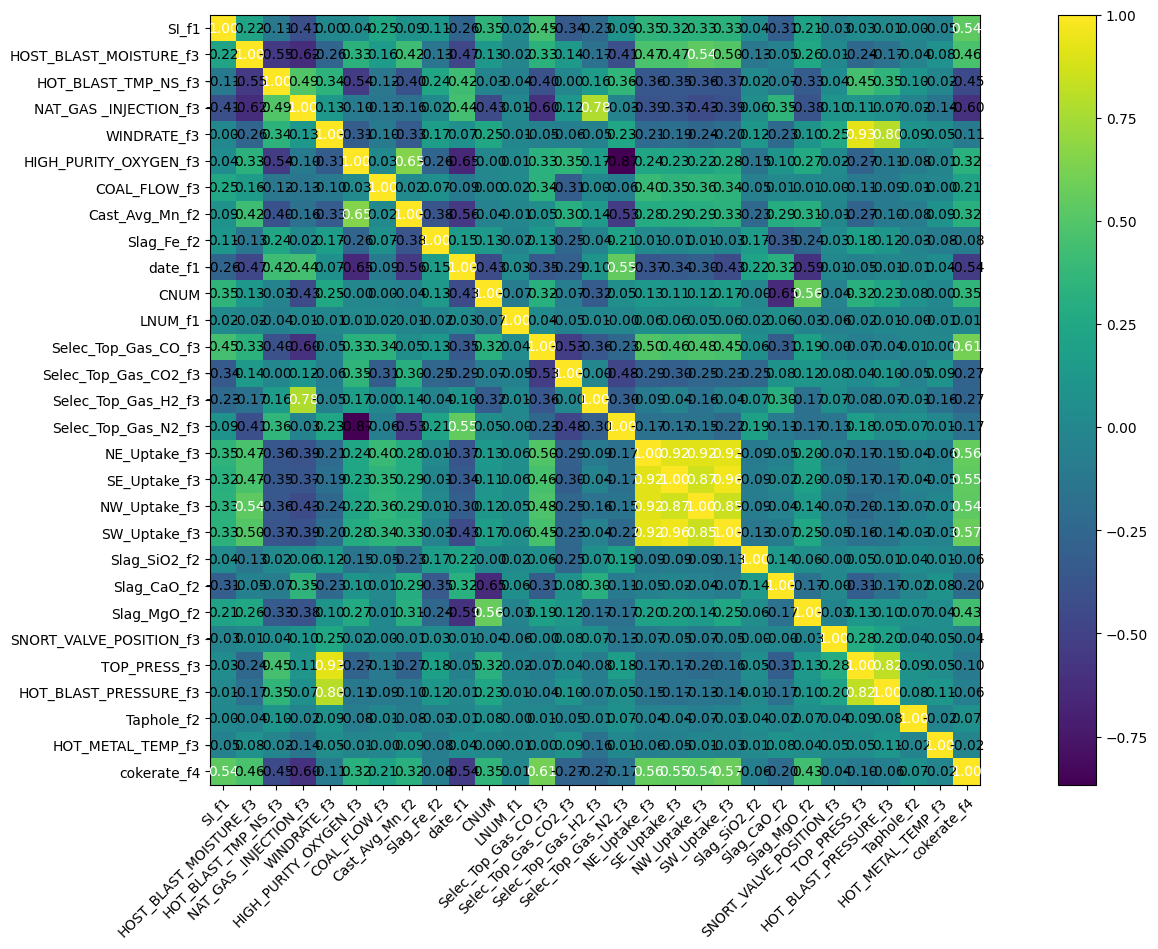

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

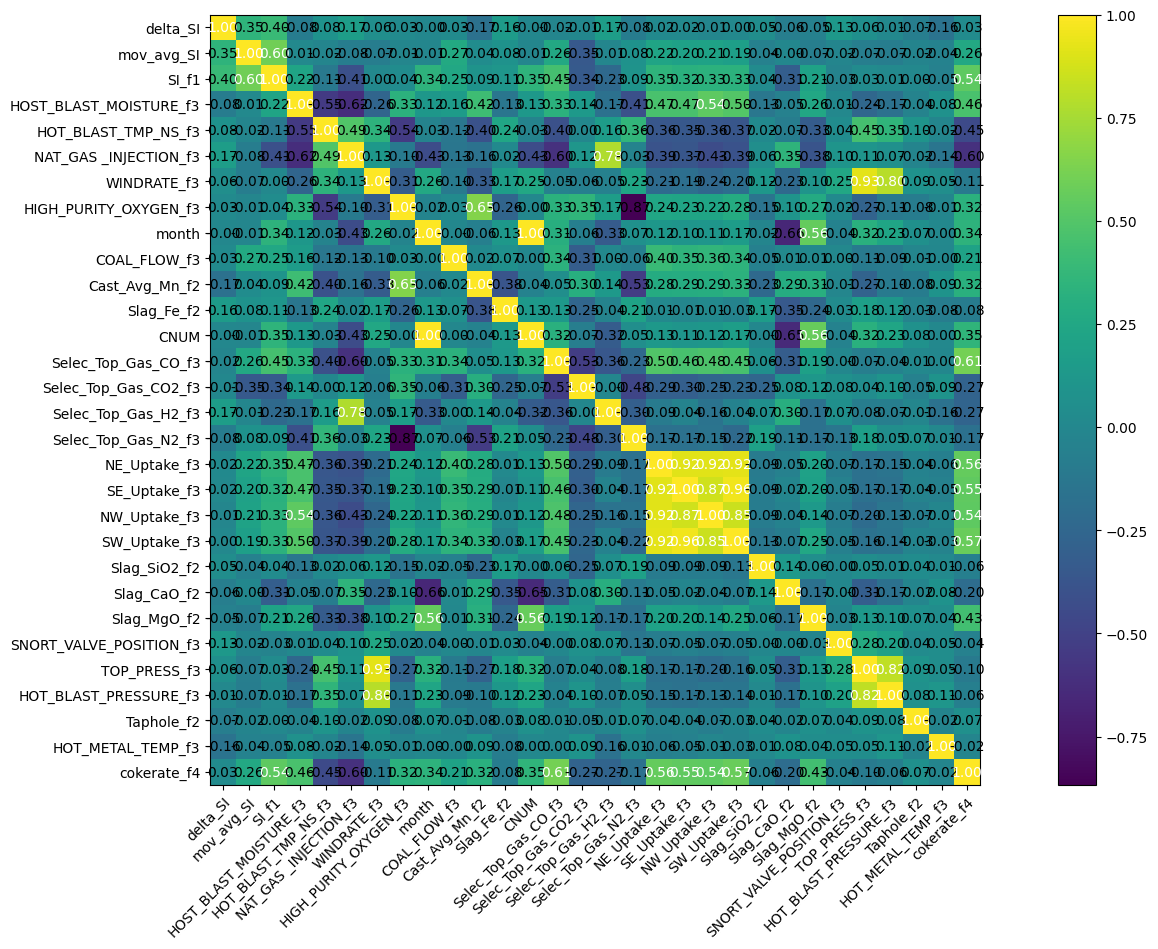

In [16]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [17]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [18]:


def function_train_rc_old( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)

    sdtw_criterion = SoftDTW(use_cuda=True, gamma=0.1)

    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
      
        ###########################################
        
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   

        ###########################################
        
        ## loss_change_pred = loss_change_pred[ :, : 10 ]
        ## loss_change_real = loss_change_real[ :, : 10 ]
        ## T = loss_change_pred.shape[1] + 1   ## remove rc

        ###########################################
        
        loss_A = 0 ### 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 ### 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 ### 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )

        ############################################
        
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
  
        ##loss_DTW = sdtw_criterion(loss_change_pred.reshape(B,(T-1), E )[:,:, 2:3], loss_change_real.reshape(B, (T-1),E )[:, :, 2:3] )  
        ## loss_DTW = ( loss_DTW )**2
        ##loss_DTW = loss_DTW.mean()  

        #######################################################

        ## Curve_SIMs[1] 

        ##loss_total = loss_DTW        ## * 0.001 + Curve_SIMs[3]     ## loss_SI
        
        loss_total = loss_SI
        
        ## loss_total = loss_SI + loss_all +  Curve_SIMs[3]
        
        #######################################################
        
        optimizer.zero_grad( set_to_none=True )    
        loss = loss_total          
        loss.backward()
        optimizer.step()
        
        #######################################################
        
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print("loss_SI...", [ loss_SI  ] )
            print("loss_all..", [ loss_all ] )
            ##print("loss_DTW..", loss_DTW     )
            print("loss_total..", loss_total )
            print("*************************")
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        



In [19]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        # === Forward Pass with Reasoning Mode ===
        pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
   
        loss_SI  = criterion(pred_si, y_si)
        ## loss_SI  = criterion(pred[:, 2], y_train[:, 2])       # special loss on feature 2
        
        loss_all = criterion(pred, y_train)

        ####################################################################################
        
        alpha = 0.9
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        loss_total = loss_SI 

        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [20]:

'''

batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
x.shape
x[1, 1, :5]

## x[1, 1, 2:3]

'''


'\n\nbatch_size, len_x, len_y, dims = 8, 15, 12, 5\nx = torch.rand((batch_size, len_x, dims), requires_grad=True)\ny = torch.rand((batch_size, len_y, dims))\nx.shape\nx[1, 1, :5]\n\n## x[1, 1, 2:3]\n\n'

In [21]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.542163
Loss_SI: 0.542163074016571 Loss_all: 0.8072065114974976
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.091142
Loss_SI: 0.09114153683185577 Loss_all: 4.051784992218018
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.024185
Loss_SI: 0.024184778332710266 Loss_all: 4.297205924987793
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.005981
Loss_SI: 0.0059813885018229485 Loss_all: 4.147062301635742
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.006406
Loss_SI: 0.006405653432011604 Loss_all: 4.297731876373291
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.005739
Loss_SI: 0.00573852751404047 Loss_all: 4.1072773933410645
Prediction shape: torch.Size([32, 35])
===


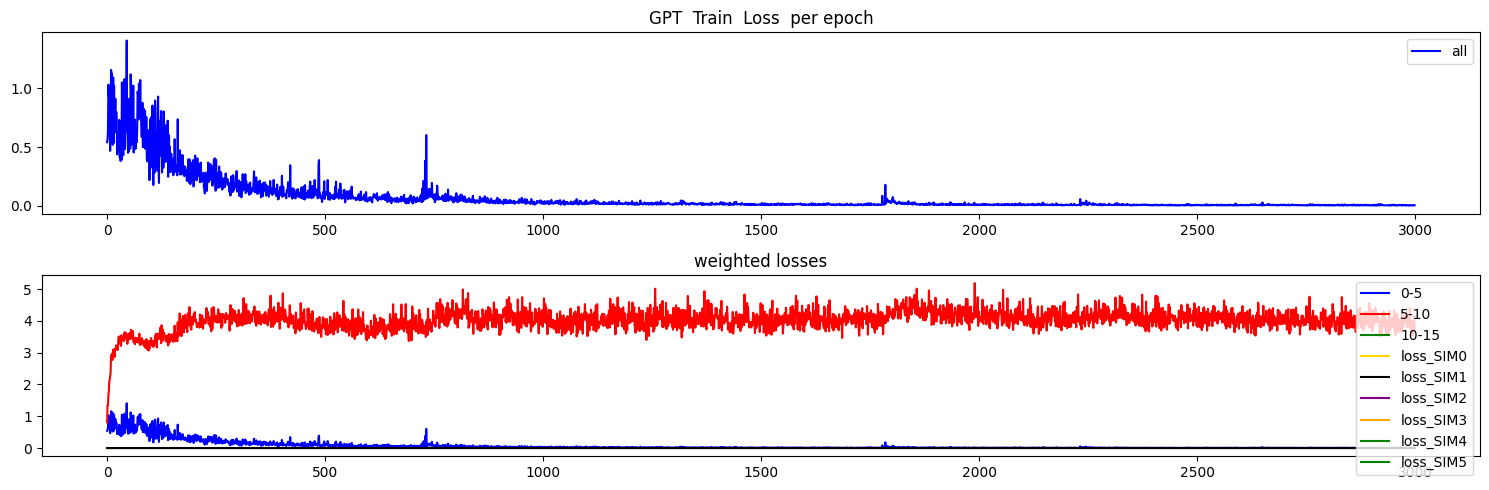

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


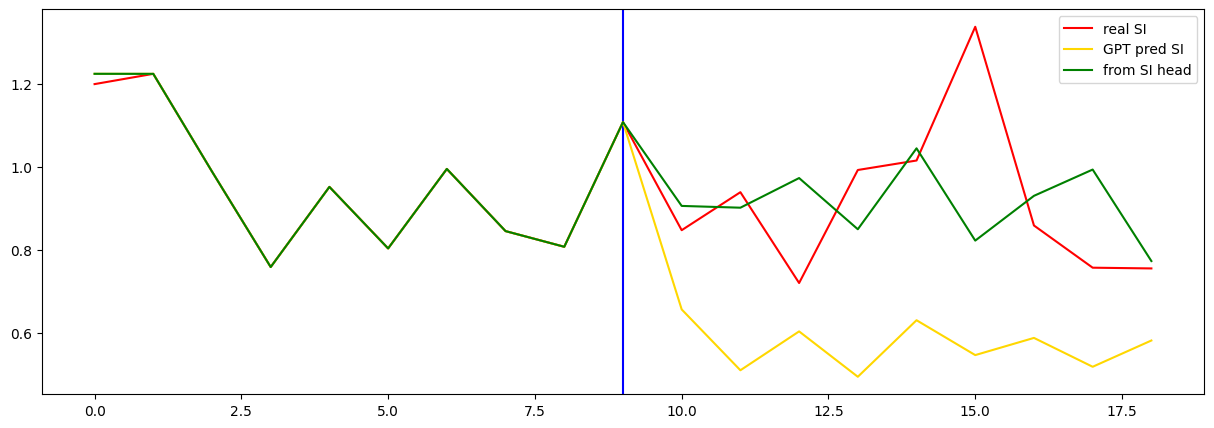

Testing R**2 - (all) - (no inputs):  0.8596782404099688
Testing R**2 - (f2) - SI full (no inputs):  -3.539542763147006
0 ...index R**2 (no inputs):  -0.7943118324903231
1 ...index R**2 (no inputs):  -0.9508359426403779
2 ...index R**2 (no inputs):  -3.539542763147006
3 ...index R**2 (no inputs):  -31.05594152524528
4 ...index R**2 (no inputs):  -1208.2025125618118
5 ...index R**2 (no inputs):  -148.3429010737087
6 ...index R**2 (no inputs):  -758.5201628550935
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9105604094948594
10 ...index R**2 (no inputs):  -2.7875911018481694
11 ...index R**2 (no inputs):  -468.680704439889
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.5309630504144396
16 ...index R**2 (no inputs):  -5.489053310410788
17 ...index R**2 (no inputs):  -180.51019002695878
18 ...index R**2 (no inputs):  -164.74922671404525
19 ...ind

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


results_string = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 0.647701
Loss_SI: 0.6477013230323792 Loss_all: 1.178253173828125
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.721360
Loss_SI: 0.7213599681854248 Loss_all: 5.253389358520508
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.156737
Loss_SI: 0.1567365676164627 Loss_all: 4.186127185821533
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.063409
Loss_SI: 0.0634090006351471 Loss_all: 4.523326873779297
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.030040
Loss_SI: 0.03004046529531479 Loss_all: 4.095037937164307
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.029064
Loss_SI: 0.029063811525702477 Loss_all: 4.535279273986816
Prediction shape: torch.Size([32, 35])
===


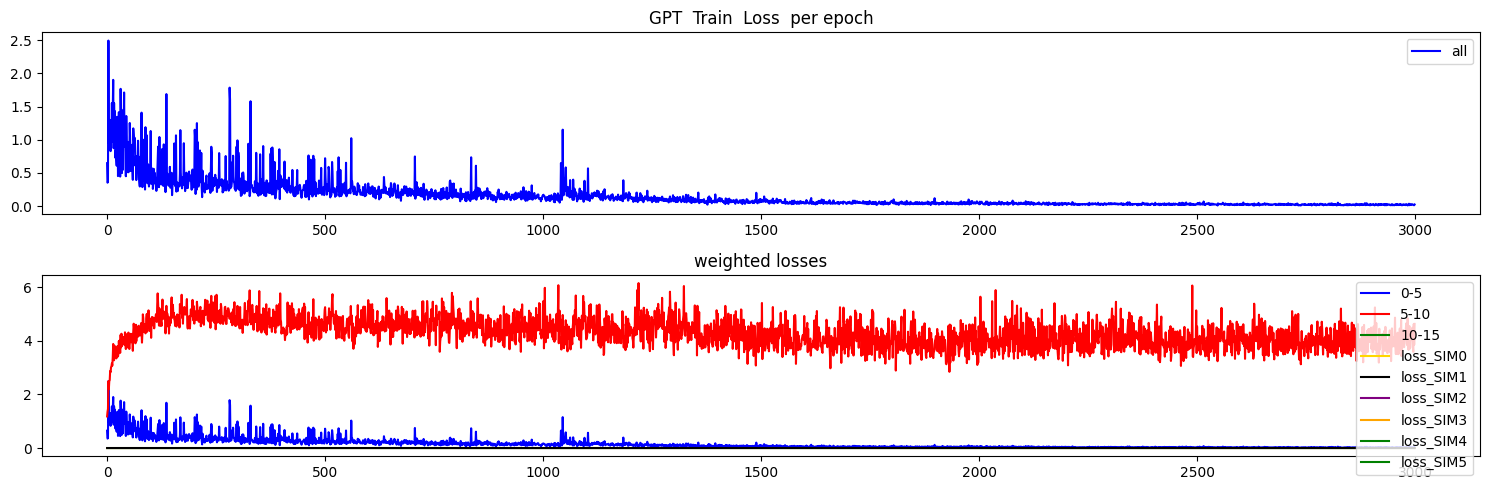

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


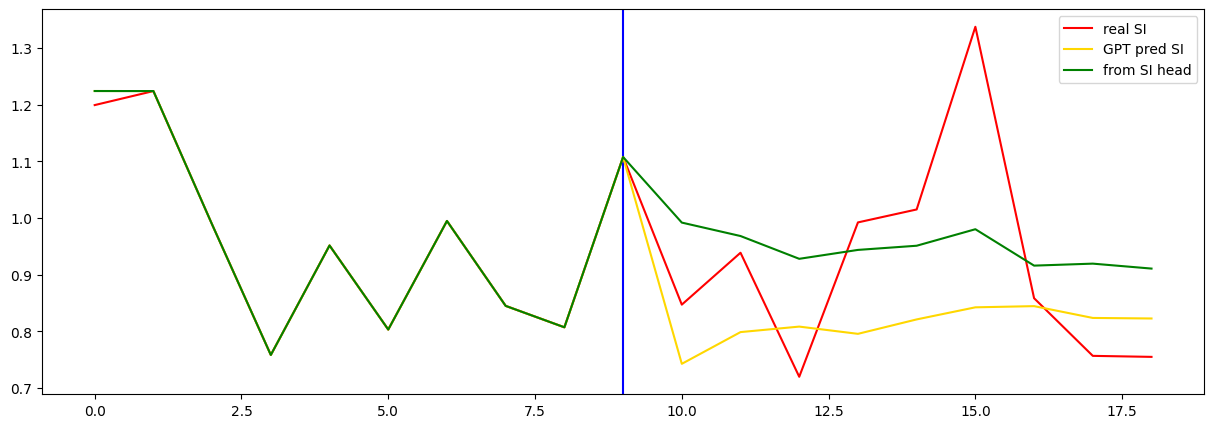

Testing R**2 - (all) - (no inputs):  0.4616104475557289
Testing R**2 - (f2) - SI full (no inputs):  -0.54265996552778
0 ...index R**2 (no inputs):  -0.7856126628278903
1 ...index R**2 (no inputs):  -6.656475867492697
2 ...index R**2 (no inputs):  -0.54265996552778
3 ...index R**2 (no inputs):  -6.33148542757846
4 ...index R**2 (no inputs):  -428.34044307835893
5 ...index R**2 (no inputs):  -574.060915019173
6 ...index R**2 (no inputs):  -315.2076215813718
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.0009120452343849283
10 ...index R**2 (no inputs):  -0.24887961362853162
11 ...index R**2 (no inputs):  -19.615300545324395
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -17.82250060839862
16 ...index R**2 (no inputs):  -19.130846202267616
17 ...index R**2 (no inputs):  -3557.694791666667
18 ...index R**2 (no inputs):  -4.546884121870468
19 ...index

In [23]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


results_string = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


[0] Train Loss: 1.316071
Loss_SI: 1.3160710334777832 Loss_all: 1.201104998588562
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.796875
Loss_SI: 0.7968754768371582 Loss_all: 5.091257572174072
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.493962
Loss_SI: 0.49396225810050964 Loss_all: 4.1453328132629395
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.176930
Loss_SI: 0.1769300401210785 Loss_all: 5.285550594329834
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.062268
Loss_SI: 0.06226760894060135 Loss_all: 5.434098720550537
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.042882
Loss_SI: 0.04288247227668762 Loss_all: 4.84481954574585
Prediction shape: torch.Size([32, 35])
===


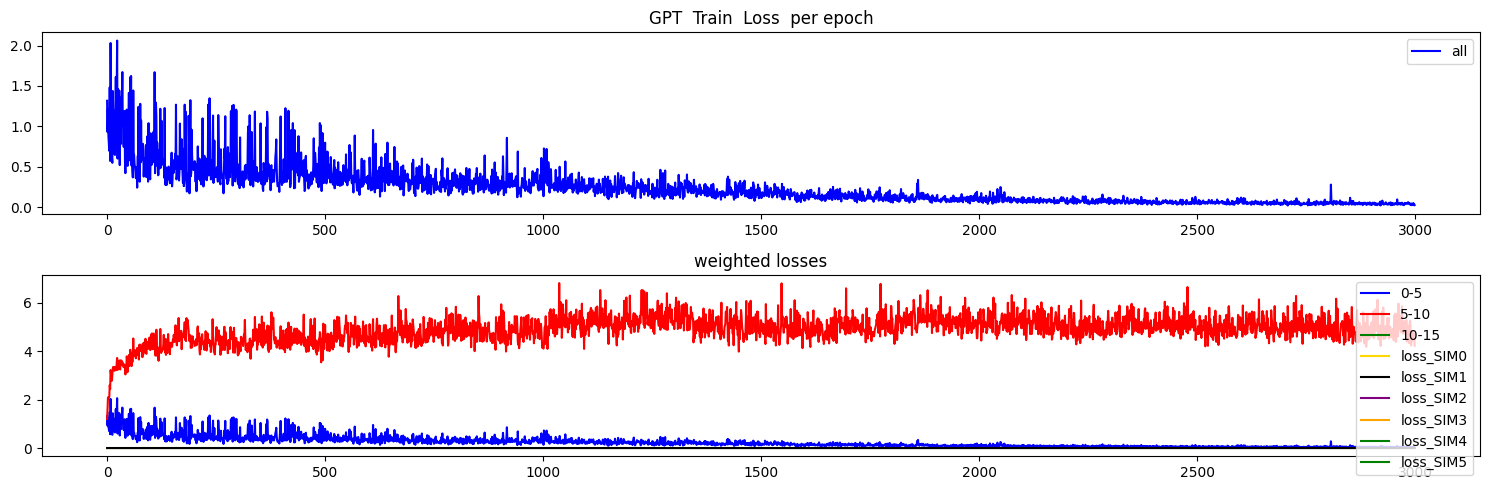

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


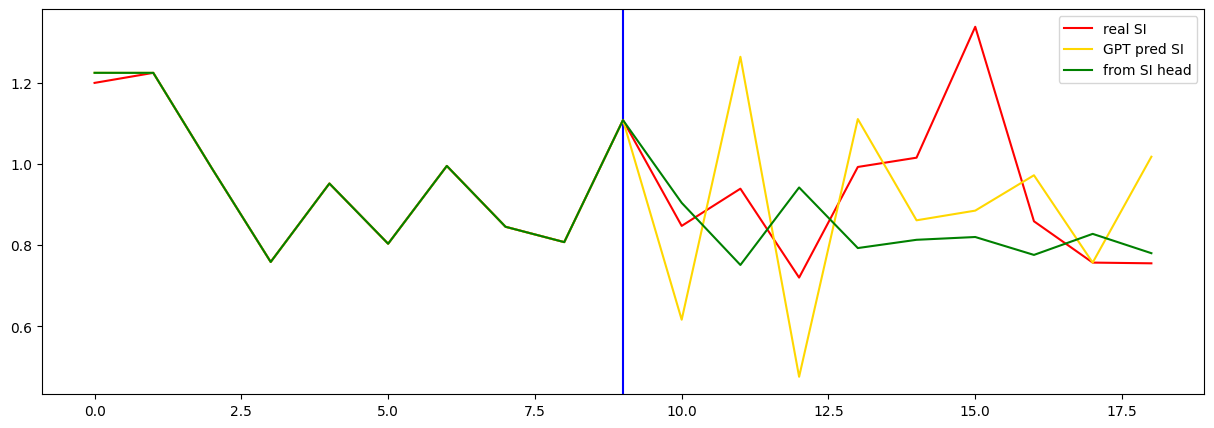

Testing R**2 - (all) - (no inputs):  0.36064633571726823
Testing R**2 - (f2) - SI full (no inputs):  -1.7680006137202273
0 ...index R**2 (no inputs):  -1.6042620698436365
1 ...index R**2 (no inputs):  -2.487386322940531
2 ...index R**2 (no inputs):  -1.7680006137202273
3 ...index R**2 (no inputs):  -123.96222478982196
4 ...index R**2 (no inputs):  -1480.4946149198554
5 ...index R**2 (no inputs):  -679.0671670481845
6 ...index R**2 (no inputs):  -3893.854617972712
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.8220122904241638
10 ...index R**2 (no inputs):  -0.33621897595771433
11 ...index R**2 (no inputs):  -4067.4127498330586
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -10.0601955242951
16 ...index R**2 (no inputs):  -17.030772734621628
17 ...index R**2 (no inputs):  -25162.715625
18 ...index R**2 (no inputs):  -331.55956485973877
19 ...inde

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 2.995193
Loss_SI: 2.995192527770996 Loss_all: 1.4075766801834106
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.305176
Loss_SI: 0.3051764667034149 Loss_all: 4.9420061111450195
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.187116
Loss_SI: 0.18711598217487335 Loss_all: 6.140005588531494
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.590181
Loss_SI: 0.5901811122894287 Loss_all: 7.1770100593566895
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.294103
Loss_SI: 0.29410308599472046 Loss_all: 7.299460411071777
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.119023
Loss_SI: 0.11902303993701935 Loss_all: 6.781885623931885
Prediction shape: torch.Size([32, 35])
===


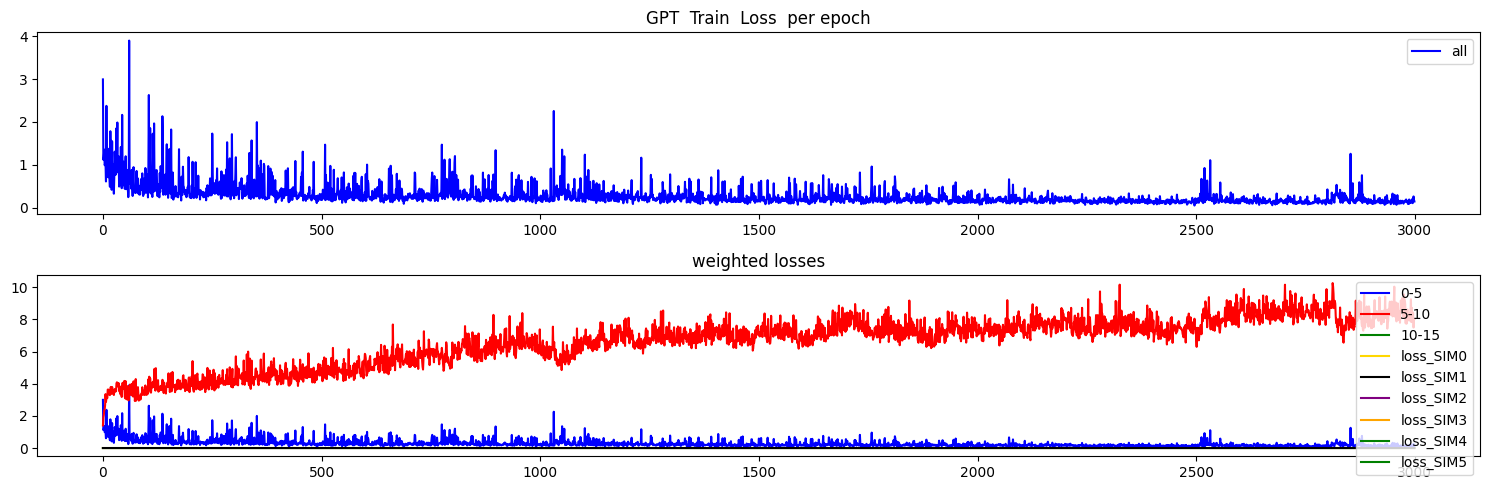

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


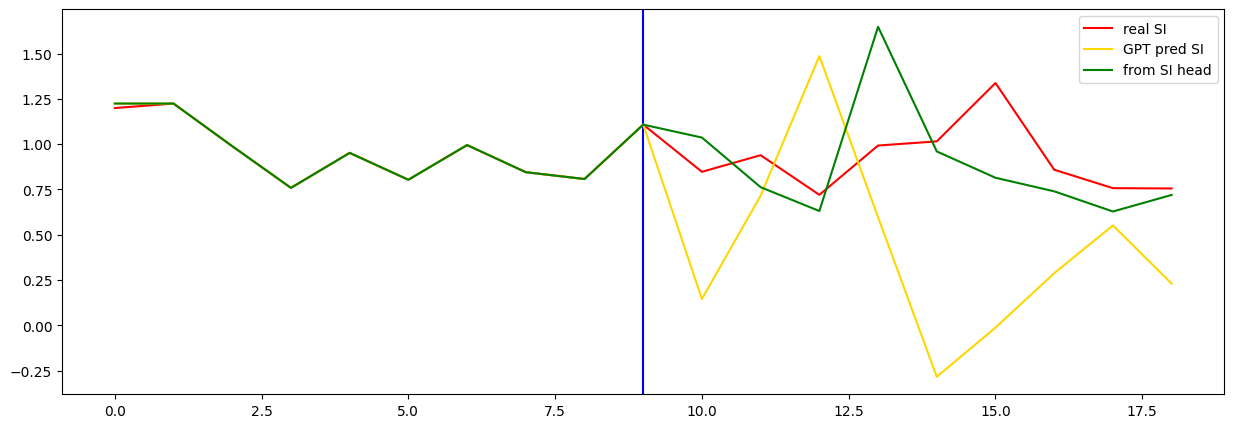

Testing R**2 - (all) - (no inputs):  -0.2598593219675336
Testing R**2 - (f2) - SI full (no inputs):  -14.900760897115717
0 ...index R**2 (no inputs):  -17.604855182051946
1 ...index R**2 (no inputs):  -6.429288433840322
2 ...index R**2 (no inputs):  -14.900760897115717
3 ...index R**2 (no inputs):  -100.6984981188159
4 ...index R**2 (no inputs):  -12009.242702988491
5 ...index R**2 (no inputs):  -1340.111022259514
6 ...index R**2 (no inputs):  -6070.5314703610275
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -10.75693893738752
10 ...index R**2 (no inputs):  -12.15349216231287
11 ...index R**2 (no inputs):  -1690.8200685355077
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -56.442222741714964
16 ...index R**2 (no inputs):  -12.64789281158702
17 ...index R**2 (no inputs):  -26951.939973958335
18 ...index R**2 (no inputs):  -478.739828650851
19 ...in

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



## Run 2


In [26]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.593825
Loss_SI: 0.5938253402709961 Loss_all: 0.9930652379989624
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.090573
Loss_SI: 0.09057310223579407 Loss_all: 4.094404697418213
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.024441
Loss_SI: 0.024440942332148552 Loss_all: 3.989156723022461
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.016167
Loss_SI: 0.016166850924491882 Loss_all: 3.7599940299987793
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.009751
Loss_SI: 0.00975140742957592 Loss_all: 3.687324285507202
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.005478
Loss_SI: 0.005478287115693092 Loss_all: 3.5483946800231934
Prediction shape: torch.Size([32, 35])
===


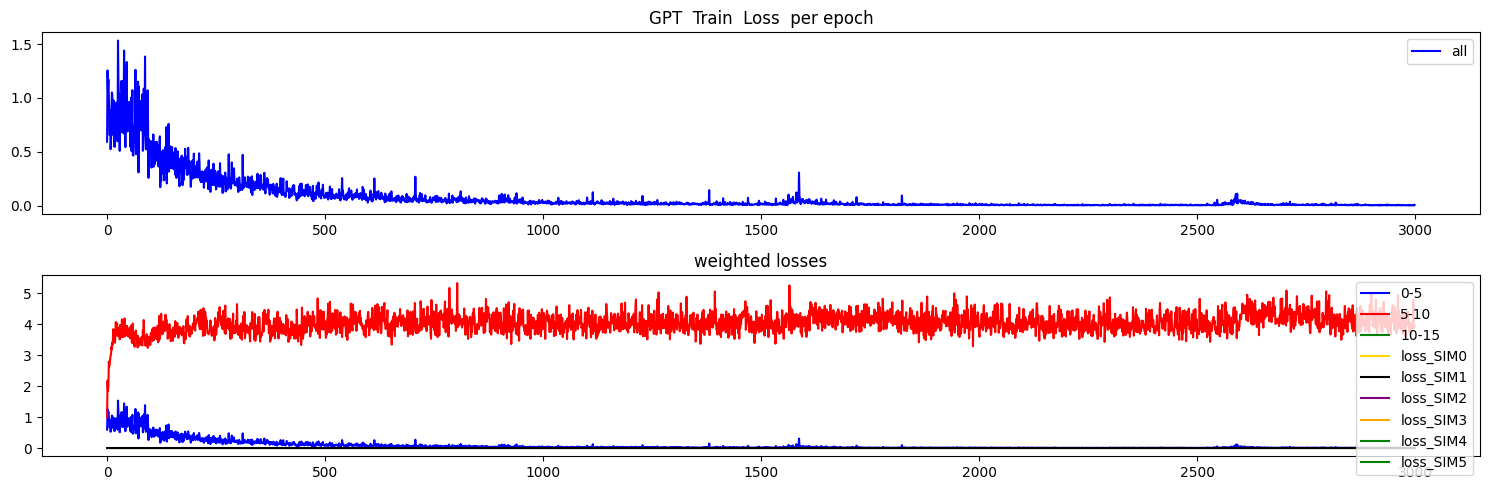

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


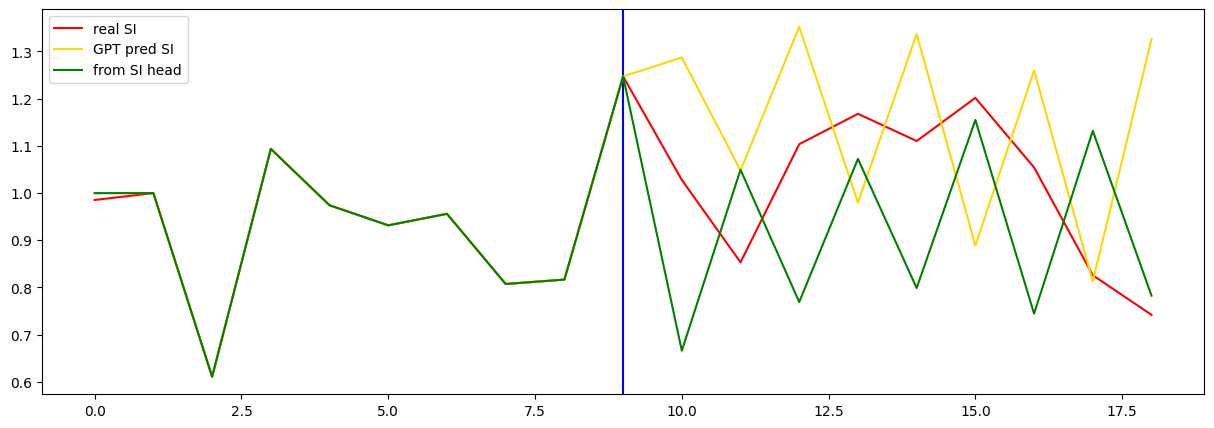

Testing R**2 - (all) - (no inputs):  0.9937256524845511
Testing R**2 - (f2) - SI full (no inputs):  -1.8052386385115193
0 ...index R**2 (no inputs):  -10.631607673289267
1 ...index R**2 (no inputs):  -2.799007220993098
2 ...index R**2 (no inputs):  -1.8052386385115193
3 ...index R**2 (no inputs):  -154.62100858328884
4 ...index R**2 (no inputs):  -19.67477450282809
5 ...index R**2 (no inputs):  0.3930108325791106
6 ...index R**2 (no inputs):  -6183.614236220959
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -7.842784671069216
10 ...index R**2 (no inputs):  -4.154478093329247
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.8192754916405747
16 ...index R**2 (no inputs):  -3.5502153783060404
17 ...index R**2 (no inputs):  -969.2070431391398
18 ...index R**2 (no inputs):  -5.324345626745404
19 ...index R**2 (no inpu

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 0.822767
Loss_SI: 0.822766900062561 Loss_all: 1.2146538496017456
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.303695
Loss_SI: 0.30369535088539124 Loss_all: 3.233701467514038
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.062839
Loss_SI: 0.0628385916352272 Loss_all: 3.252427816390991
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.043920
Loss_SI: 0.04392006993293762 Loss_all: 3.3830699920654297
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.027661
Loss_SI: 0.027660980820655823 Loss_all: 3.036973714828491
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.012822
Loss_SI: 0.012822294607758522 Loss_all: 3.142531156539917
Prediction shape: torch.Size([32, 35])
===


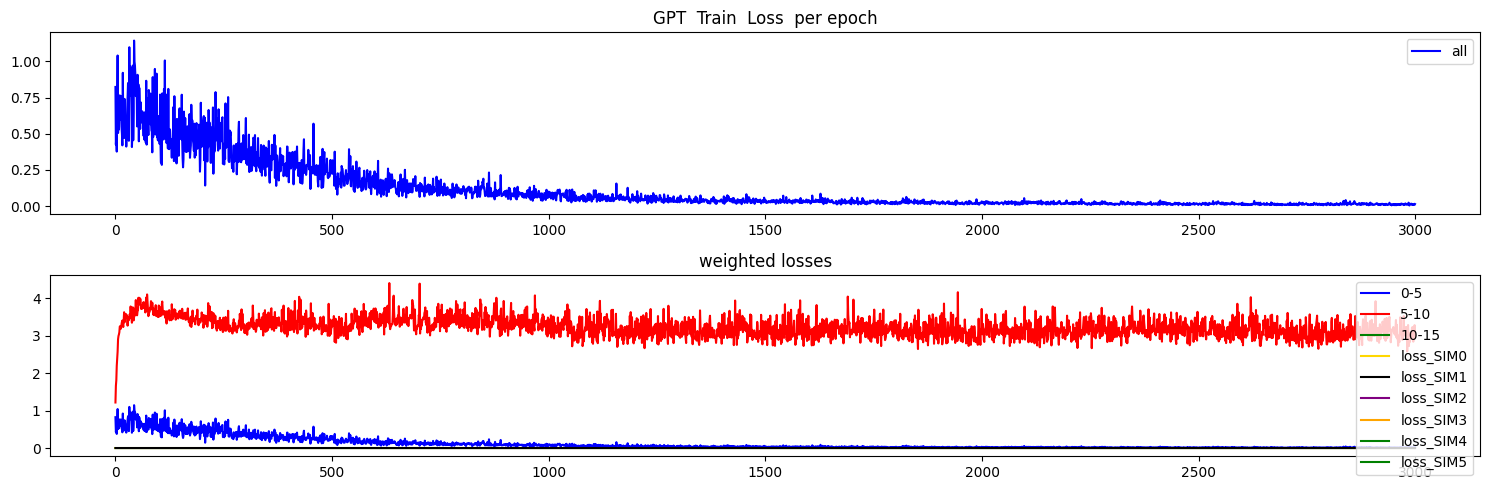

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


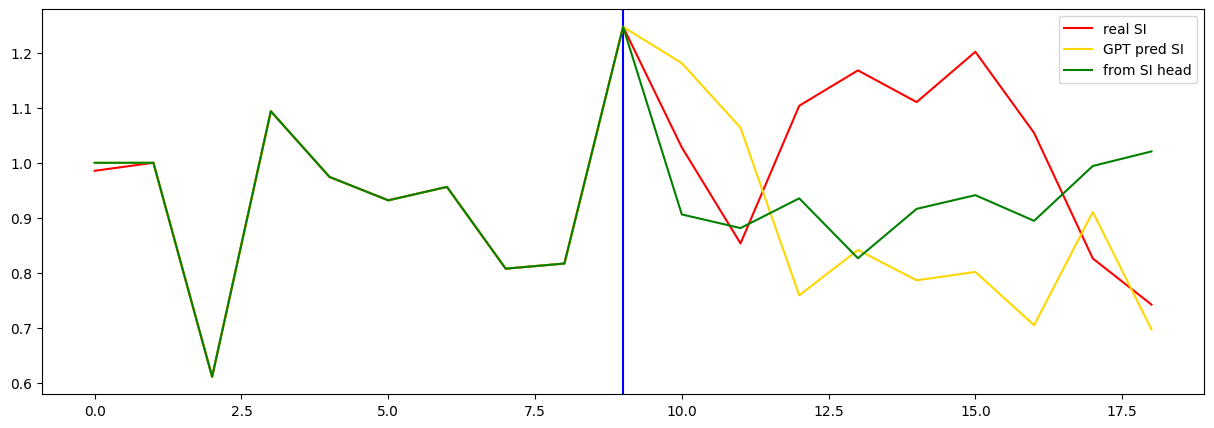

Testing R**2 - (all) - (no inputs):  0.9748017880814436
Testing R**2 - (f2) - SI full (no inputs):  -2.339056742698342
0 ...index R**2 (no inputs):  -4.490634826137687
1 ...index R**2 (no inputs):  0.07235871290920992
2 ...index R**2 (no inputs):  -2.339056742698342
3 ...index R**2 (no inputs):  -502.2044069870551
4 ...index R**2 (no inputs):  -69.03123997040309
5 ...index R**2 (no inputs):  -1.4763670062443262
6 ...index R**2 (no inputs):  -11307.914708433302
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.272468462092621
10 ...index R**2 (no inputs):  -3.813626164509036
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.144142190804101
16 ...index R**2 (no inputs):  -0.8309978650753549
17 ...index R**2 (no inputs):  -2609.7857198079428
18 ...index R**2 (no inputs):  -18.143687700202392
19 ...index R**2 (no inpu

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 0.690000
Loss_SI: 0.6899996399879456 Loss_all: 1.0664693117141724
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.419333
Loss_SI: 0.41933345794677734 Loss_all: 3.3618338108062744
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.279357
Loss_SI: 0.27935707569122314 Loss_all: 5.517209529876709
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.120921
Loss_SI: 0.12092123925685883 Loss_all: 5.285146236419678
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.112294
Loss_SI: 0.11229398846626282 Loss_all: 6.666440963745117
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.061115
Loss_SI: 0.061114534735679626 Loss_all: 4.606538772583008
Prediction shape: torch.Size([32, 35])
===


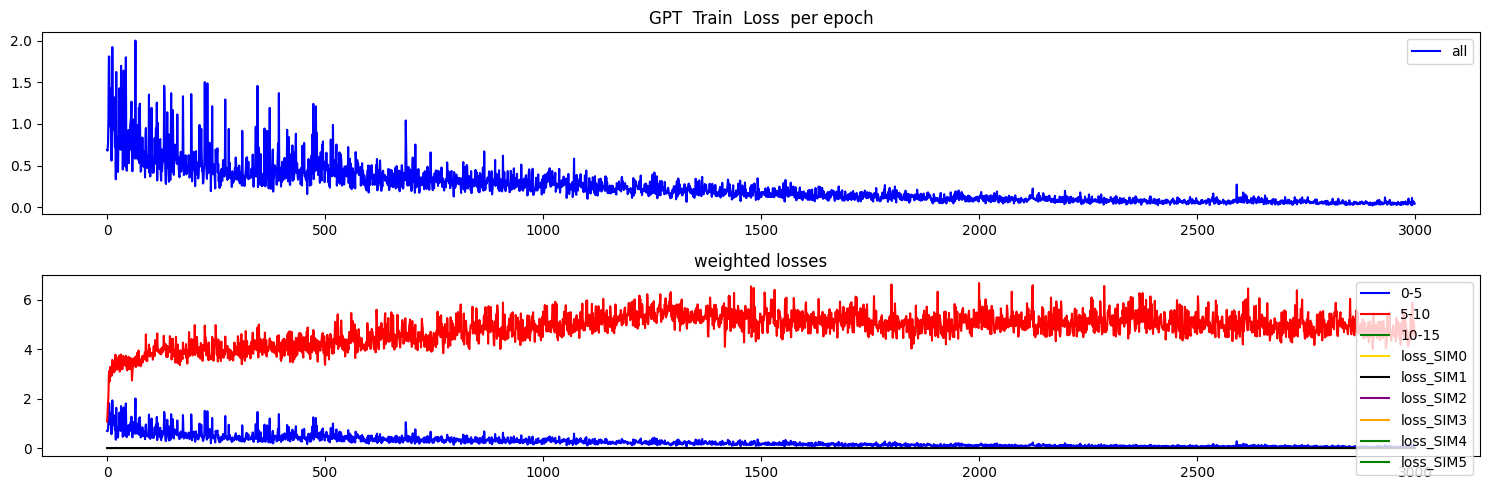

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


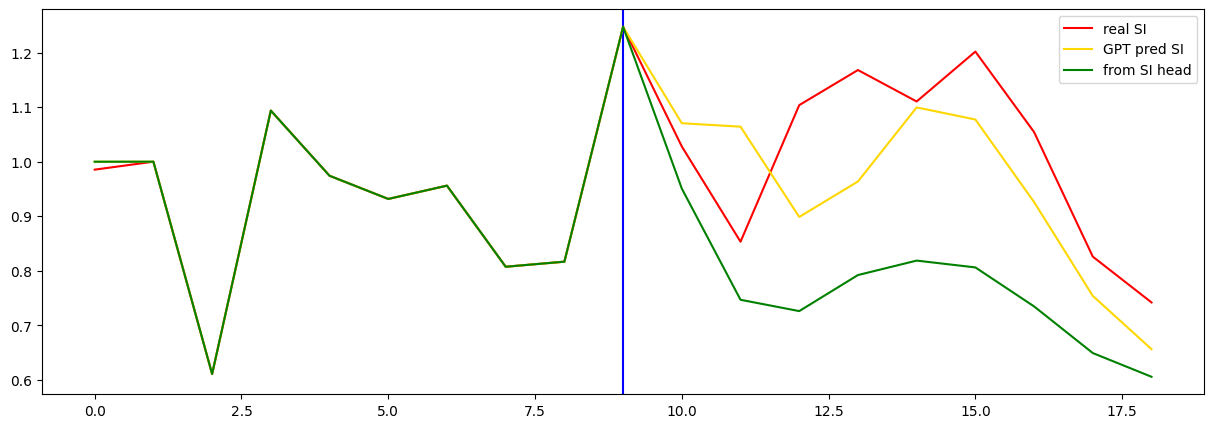

Testing R**2 - (all) - (no inputs):  0.6173894397771058
Testing R**2 - (f2) - SI full (no inputs):  -0.27683436321295396
0 ...index R**2 (no inputs):  -0.3624286391916953
1 ...index R**2 (no inputs):  -0.2299870919118785
2 ...index R**2 (no inputs):  -0.27683436321295396
3 ...index R**2 (no inputs):  -270.86745560300915
4 ...index R**2 (no inputs):  -97.0134279334125
5 ...index R**2 (no inputs):  -37.10414795055347
6 ...index R**2 (no inputs):  -6443.360638456144
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -4.607703308722351
10 ...index R**2 (no inputs):  -37.005560690492906
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -15.467567932594157
16 ...index R**2 (no inputs):  -2.48158631956142
17 ...index R**2 (no inputs):  -445.98135039011635
18 ...index R**2 (no inputs):  -1.1224918150842784
19 ...index R**2 (no i

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )


[0] Train Loss: 0.843214
Loss_SI: 0.8432143330574036 Loss_all: 1.3284906148910522
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.434378
Loss_SI: 0.43437790870666504 Loss_all: 4.331052303314209
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.330488
Loss_SI: 0.33048832416534424 Loss_all: 4.410748481750488
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.258215
Loss_SI: 0.25821512937545776 Loss_all: 5.125487804412842
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.251370
Loss_SI: 0.2513697147369385 Loss_all: 5.558191299438477
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.113191
Loss_SI: 0.11319112032651901 Loss_all: 5.770793437957764
Prediction shape: torch.Size([32, 35])
===


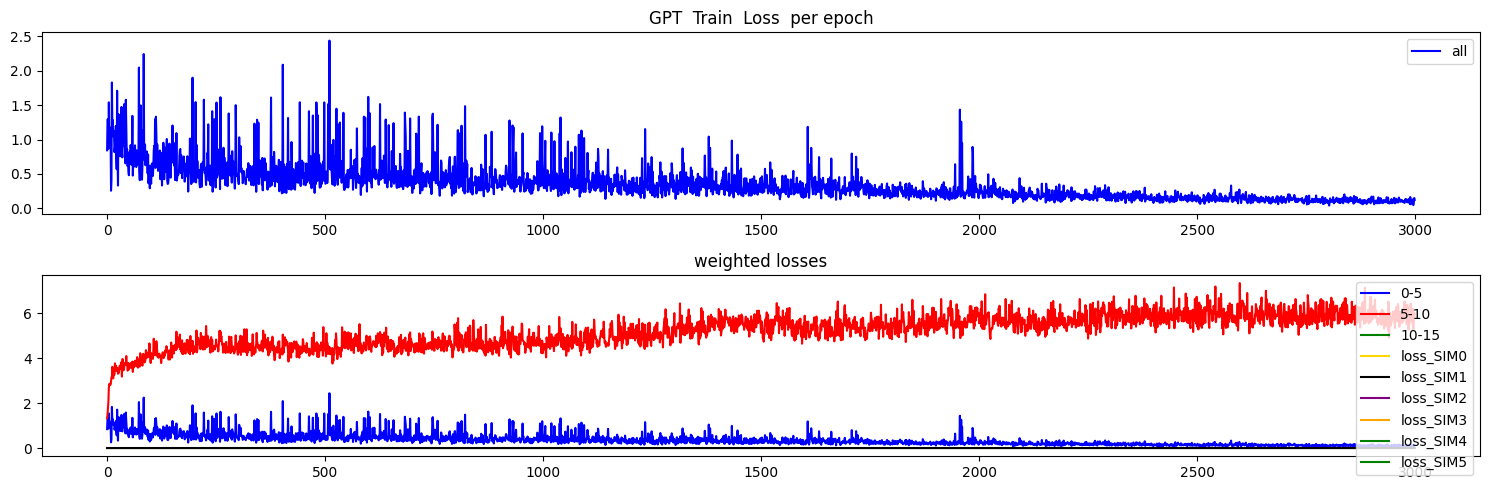

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


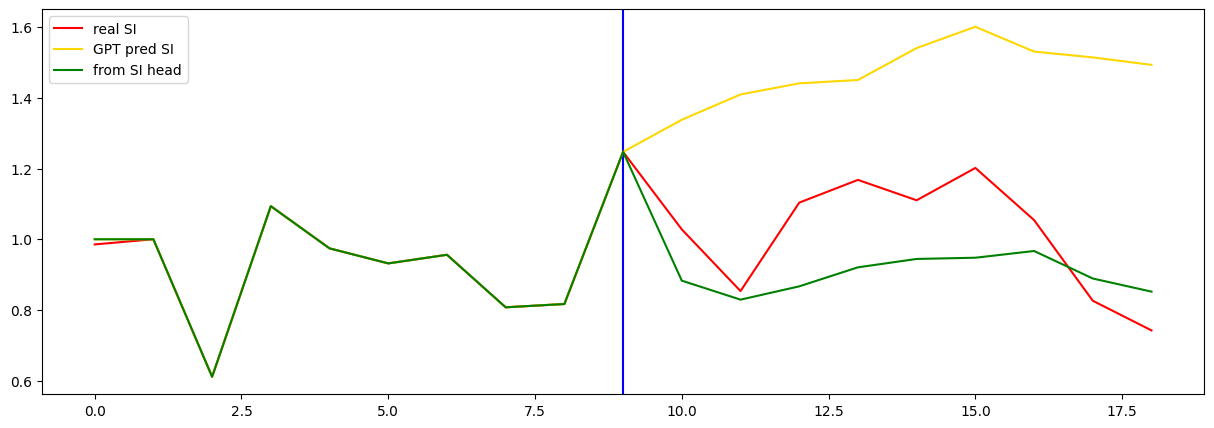

Testing R**2 - (all) - (no inputs):  0.729054118132332
Testing R**2 - (f2) - SI full (no inputs):  -9.727239418306604
0 ...index R**2 (no inputs):  -0.2860174837211087
1 ...index R**2 (no inputs):  -1.1831303708131946
2 ...index R**2 (no inputs):  -9.727239418306604
3 ...index R**2 (no inputs):  -321.5280785477287
4 ...index R**2 (no inputs):  -1239.386684728349
5 ...index R**2 (no inputs):  -25.90944736288388
6 ...index R**2 (no inputs):  -2022.1898959575865
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.08689676900749199
10 ...index R**2 (no inputs):  -1.8630446037790303
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -314.83792621415887
16 ...index R**2 (no inputs):  -8.995735481778429
17 ...index R**2 (no inputs):  -12942.466796875
18 ...index R**2 (no inputs):  -102.09764594912828
19 ...index R**2 (no input

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )



## Run 3


In [31]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.122602
Loss_SI: 1.122601866722107 Loss_all: 1.4992777109146118
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.049227
Loss_SI: 0.04922690615057945 Loss_all: 4.097059726715088
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.019561
Loss_SI: 0.019560759887099266 Loss_all: 4.155104160308838
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.014615
Loss_SI: 0.014614801853895187 Loss_all: 4.253993511199951
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.007181
Loss_SI: 0.00718103488907218 Loss_all: 4.0592827796936035
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.003741
Loss_SI: 0.0037410275544971228 Loss_all: 4.657067775726318
Prediction shape: torch.Size([32, 35])
===


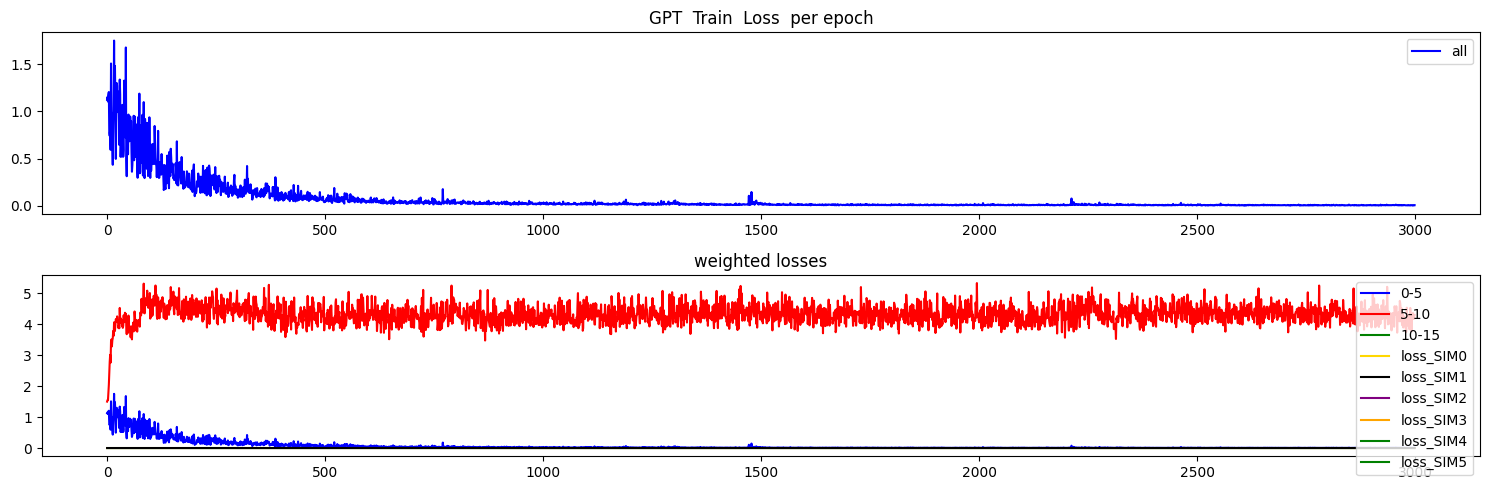

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


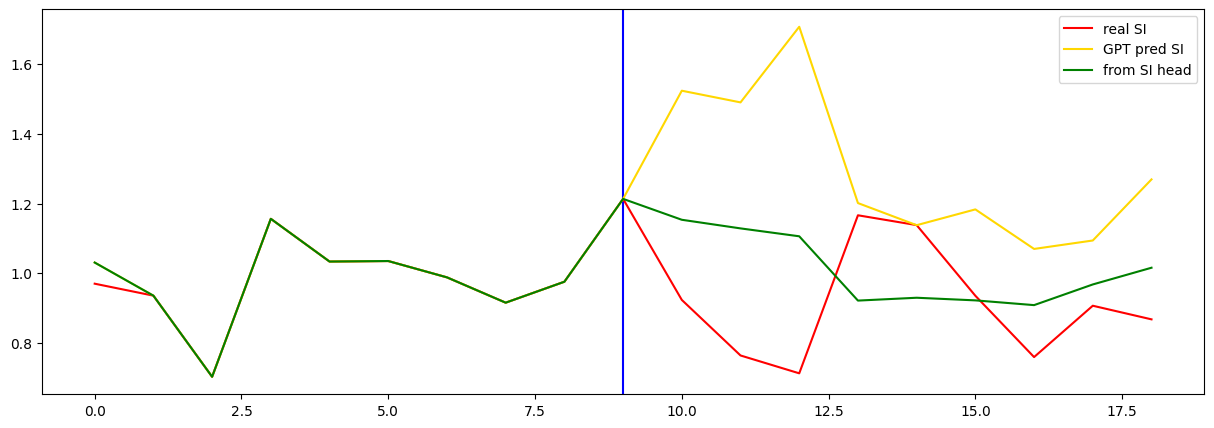

Testing R**2 - (all) - (no inputs):  0.8723549014175779
Testing R**2 - (f2) - SI full (no inputs):  -8.036140413064834
0 ...index R**2 (no inputs):  -12.840048532714201
1 ...index R**2 (no inputs):  -10.969338245815464
2 ...index R**2 (no inputs):  -8.036140413064834
3 ...index R**2 (no inputs):  -22.250136467568524
4 ...index R**2 (no inputs):  -10.35867715769026
5 ...index R**2 (no inputs):  -46.31094743540435
6 ...index R**2 (no inputs):  -246.28602238575127
7 ...index R**2 (no inputs):  -0.12516468340702658
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.8917247078265771
10 ...index R**2 (no inputs):  -3.18185963703945
11 ...index R**2 (no inputs):  -219.40022895604355
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.493789391345159
16 ...index R**2 (no inputs):  -0.21155767386930635
17 ...index R**2 (no inputs):  -924.8298859278361
18 ...index R**2 (no inputs):  -3.42936818

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 1.131082
Loss_SI: 1.1310817003250122 Loss_all: 1.1247061491012573
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.128948
Loss_SI: 0.1289484202861786 Loss_all: 4.3383307456970215
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.135544
Loss_SI: 0.13554352521896362 Loss_all: 4.089439392089844
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.075132
Loss_SI: 0.07513171434402466 Loss_all: 3.9566123485565186
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.055361
Loss_SI: 0.0553608164191246 Loss_all: 4.448906421661377
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.015123
Loss_SI: 0.015123404562473297 Loss_all: 5.196457386016846
Prediction shape: torch.Size([32, 35])
===


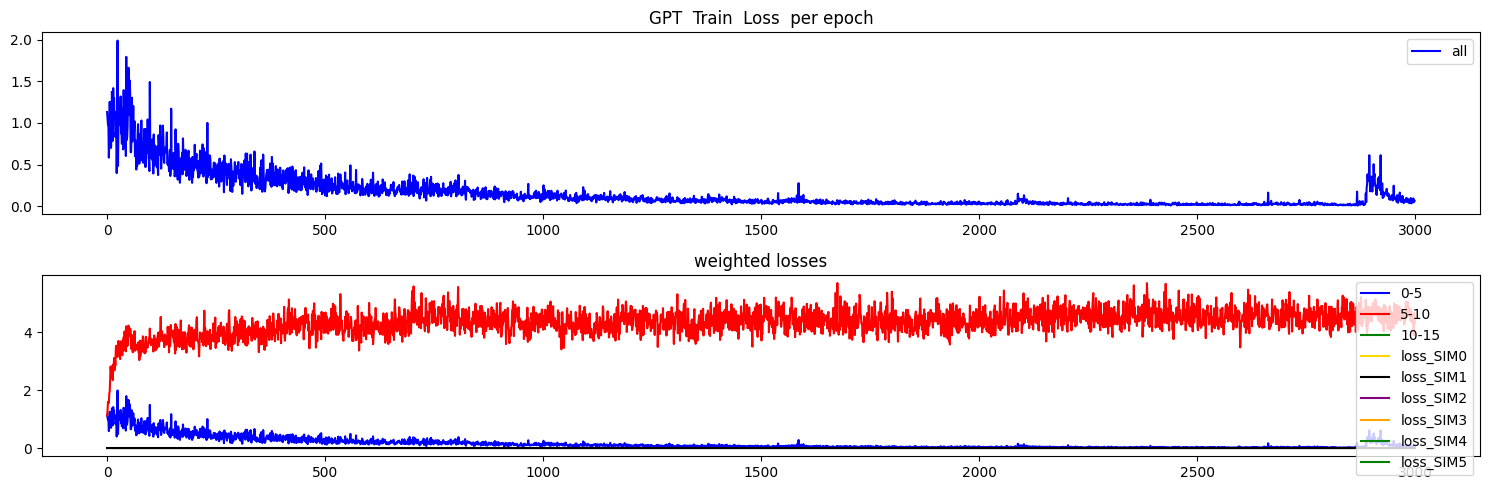

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


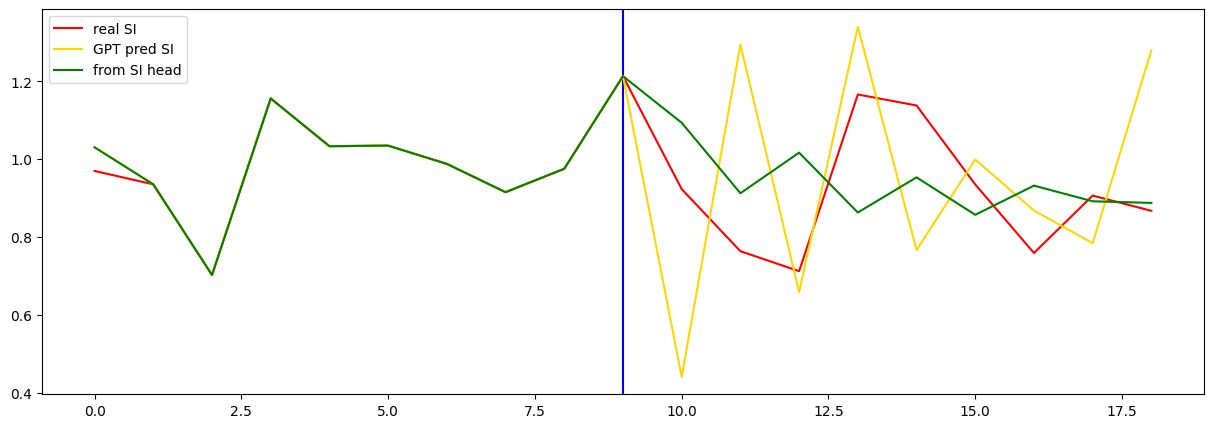

Testing R**2 - (all) - (no inputs):  0.8709837928417075
Testing R**2 - (f2) - SI full (no inputs):  -3.505382809704198
0 ...index R**2 (no inputs):  -2.9638406116949723
1 ...index R**2 (no inputs):  -0.5517846398793718
2 ...index R**2 (no inputs):  -3.505382809704198
3 ...index R**2 (no inputs):  -29.786348557931024
4 ...index R**2 (no inputs):  -7.000282319823395
5 ...index R**2 (no inputs):  -47.27899081337794
6 ...index R**2 (no inputs):  -3.8161635513126706
7 ...index R**2 (no inputs):  -0.12495533474692988
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.3712571114301353
10 ...index R**2 (no inputs):  -0.44793779856109284
11 ...index R**2 (no inputs):  -1052.433746315961
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.7361454406960117
16 ...index R**2 (no inputs):  -10.226053633636795
17 ...index R**2 (no inputs):  -1886.872021484375
18 ...index R**2 (no inputs):  -30.71794

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 0.852453
Loss_SI: 0.8524525165557861 Loss_all: 0.9663500189781189
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.471066
Loss_SI: 0.4710661768913269 Loss_all: 5.268795967102051
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.243394
Loss_SI: 0.24339446425437927 Loss_all: 5.626709938049316
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.139472
Loss_SI: 0.13947193324565887 Loss_all: 5.57806396484375
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.152550
Loss_SI: 0.1525501012802124 Loss_all: 5.616503715515137
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.053096
Loss_SI: 0.05309576913714409 Loss_all: 6.555179119110107
Prediction shape: torch.Size([32, 35])
===


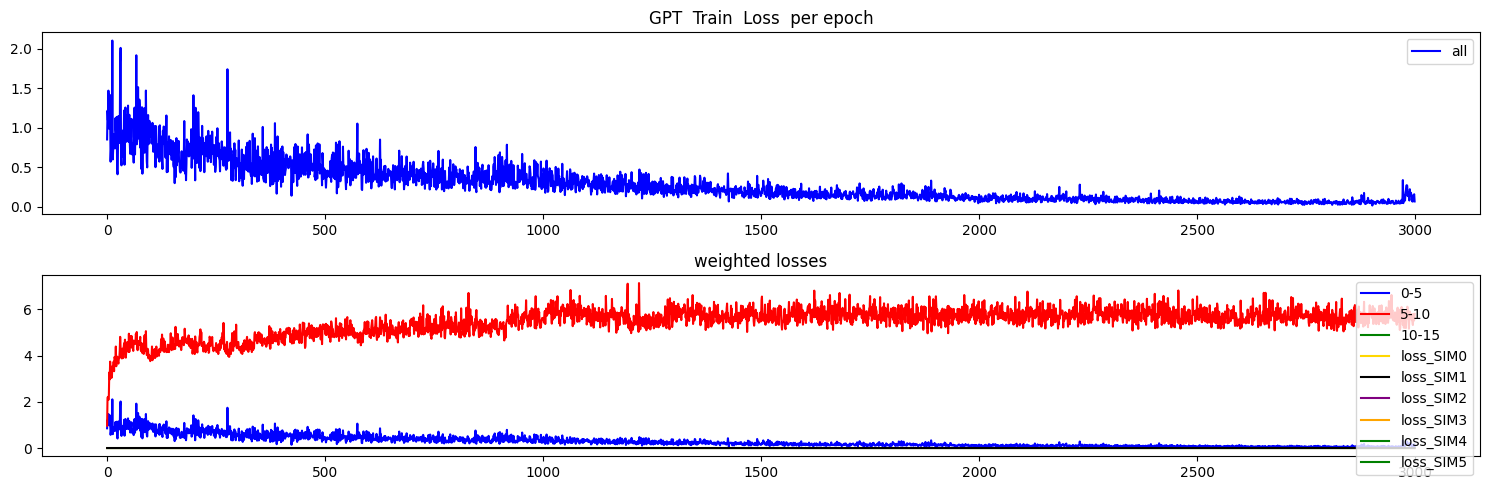

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


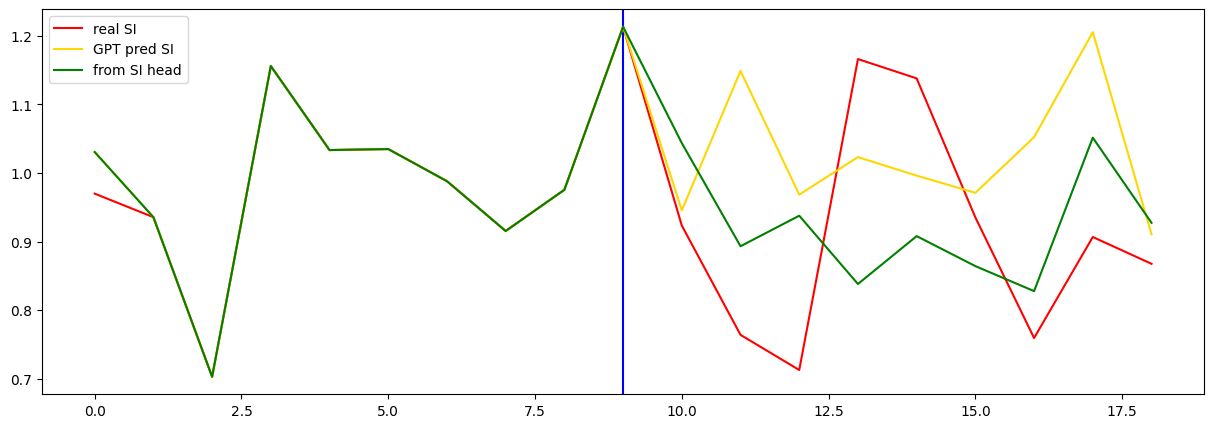

Testing R**2 - (all) - (no inputs):  0.9708337777372035
Testing R**2 - (f2) - SI full (no inputs):  -1.2416622060877716
0 ...index R**2 (no inputs):  -2.3671674876029014
1 ...index R**2 (no inputs):  -1.186728502946211
2 ...index R**2 (no inputs):  -1.2416622060877716
3 ...index R**2 (no inputs):  -3.259506258333766
4 ...index R**2 (no inputs):  -92.79534074795849
5 ...index R**2 (no inputs):  -9.551321187139257
6 ...index R**2 (no inputs):  -43.060124244575874
7 ...index R**2 (no inputs):  -13.623190966914507
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -6.326365392010037
10 ...index R**2 (no inputs):  -2.0876948660703603
11 ...index R**2 (no inputs):  -1407.5347909565755
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -28.931833286472163
16 ...index R**2 (no inputs):  -3.4525332127805406
17 ...index R**2 (no inputs):  -9267.709912109374
18 ...index R**2 (no inputs):  -43.9482251

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.055012
Loss_SI: 1.0550117492675781 Loss_all: 1.0799455642700195
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.504774
Loss_SI: 0.504773736000061 Loss_all: 5.294809818267822
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.323604
Loss_SI: 0.3236042261123657 Loss_all: 6.329940319061279
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.142640
Loss_SI: 0.14263984560966492 Loss_all: 6.410171985626221
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.210172
Loss_SI: 0.21017229557037354 Loss_all: 6.761925220489502
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.130651
Loss_SI: 0.13065092265605927 Loss_all: 6.119294166564941
Prediction shape: torch.Size([32, 35])
===


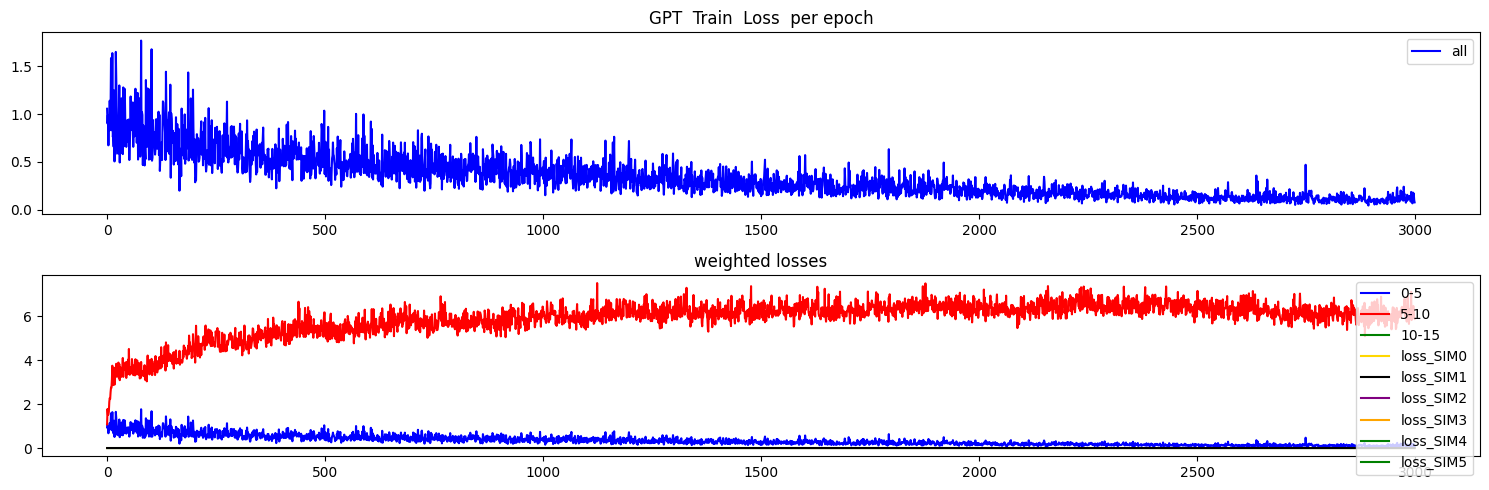

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


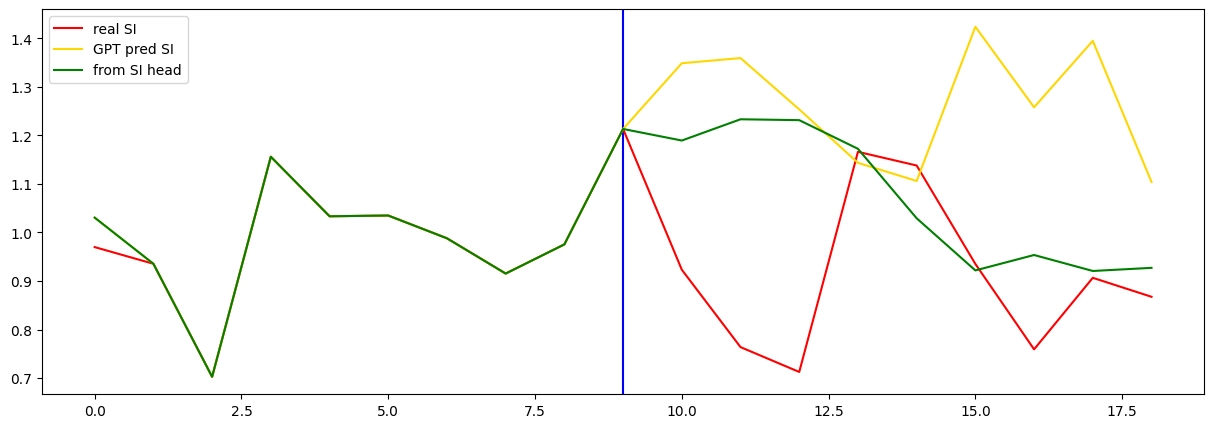

Testing R**2 - (all) - (no inputs):  0.8891010517766273
Testing R**2 - (f2) - SI full (no inputs):  -7.026979246692729
0 ...index R**2 (no inputs):  -1.7131212906323814
1 ...index R**2 (no inputs):  -3.897954029377761
2 ...index R**2 (no inputs):  -7.026979246692729
3 ...index R**2 (no inputs):  -79.29125789772236
4 ...index R**2 (no inputs):  -85.33493047042185
5 ...index R**2 (no inputs):  -40.241045162482074
6 ...index R**2 (no inputs):  -206.7200313448163
7 ...index R**2 (no inputs):  -47.57241765403304
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -4.59484090013451
10 ...index R**2 (no inputs):  -15.952112002395008
11 ...index R**2 (no inputs):  -675.2798998562396
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -6.284769202136112
16 ...index R**2 (no inputs):  -2.655065933500688
17 ...index R**2 (no inputs):  -4633.108057371775
18 ...index R**2 (no inputs):  -12.78941682569030

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



## Run 4


In [36]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.212977
Loss_SI: 1.2129766941070557 Loss_all: 1.331514596939087
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.088993
Loss_SI: 0.08899328112602234 Loss_all: 3.365893840789795
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.030205
Loss_SI: 0.030205072835087776 Loss_all: 3.3272793292999268
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.009897
Loss_SI: 0.00989680178463459 Loss_all: 3.3100881576538086
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.014265
Loss_SI: 0.014265398494899273 Loss_all: 3.574667453765869
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.010184
Loss_SI: 0.010184301994740963 Loss_all: 3.4422385692596436
Prediction shape: torch.Size([32, 35])
===


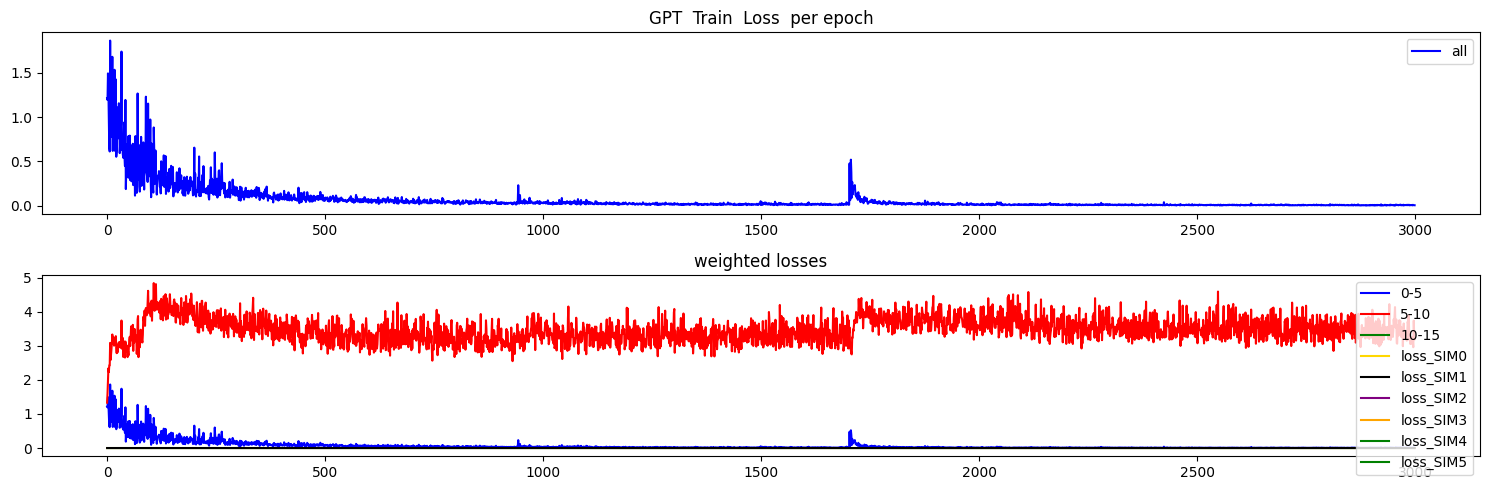

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


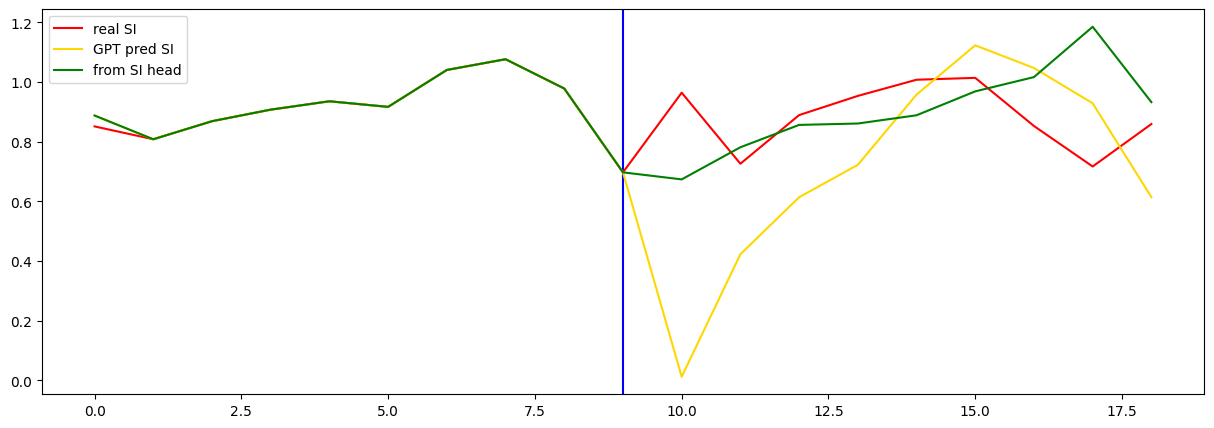

Testing R**2 - (all) - (no inputs):  0.40669194519061114
Testing R**2 - (f2) - SI full (no inputs):  -11.758967391138771
0 ...index R**2 (no inputs):  -43.82523745599842
1 ...index R**2 (no inputs):  -3.937048856754944
2 ...index R**2 (no inputs):  -11.758967391138771
3 ...index R**2 (no inputs):  -12.574450082005097
4 ...index R**2 (no inputs):  -93.9660766731032
5 ...index R**2 (no inputs):  -66.38113446126918
6 ...index R**2 (no inputs):  -3501.6974576088364
7 ...index R**2 (no inputs):  -2566893.4274644284
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.144975526353595
10 ...index R**2 (no inputs):  -2.061135307993869
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -18.755941968666992
16 ...index R**2 (no inputs):  -2.1062725895565118
17 ...index R**2 (no inputs):  -152.46898621529814
18 ...index R**2 (no inputs):  -16.556894395082196
19 ...i

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 0.893828
Loss_SI: 0.8938276767730713 Loss_all: 1.230141043663025
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.249028
Loss_SI: 0.24902769923210144 Loss_all: 3.6403238773345947
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.107143
Loss_SI: 0.1071433424949646 Loss_all: 4.850558280944824
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.050207
Loss_SI: 0.05020708590745926 Loss_all: 4.635112285614014
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.049910
Loss_SI: 0.049910277128219604 Loss_all: 5.2594828605651855
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.025442
Loss_SI: 0.02544236183166504 Loss_all: 5.202414512634277
Prediction shape: torch.Size([32, 35])
===


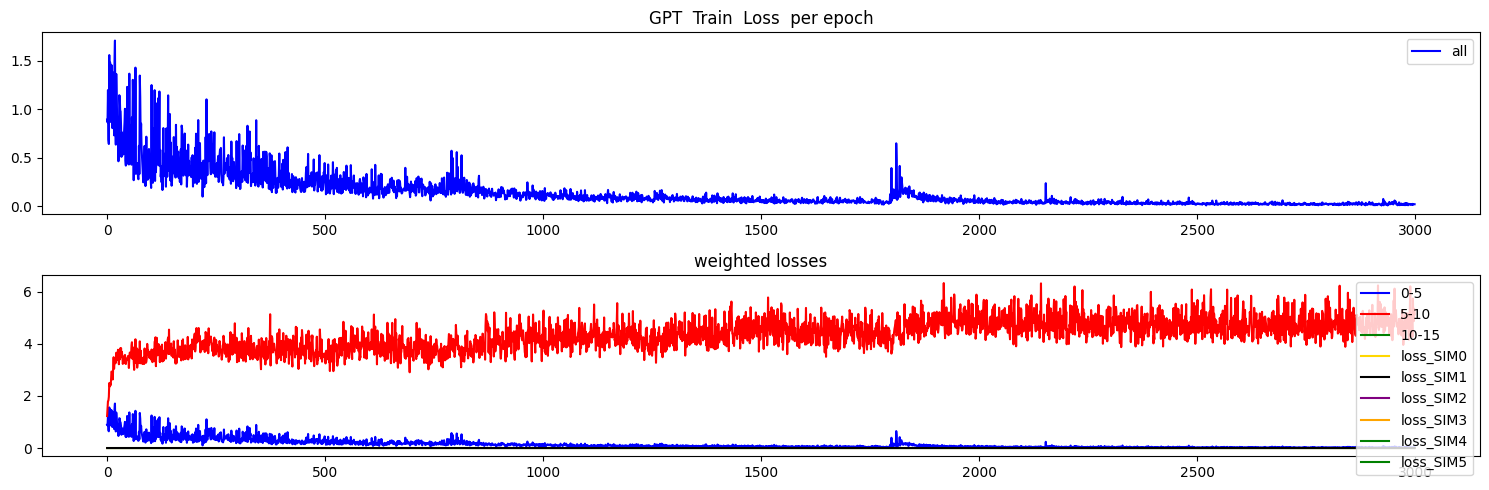

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


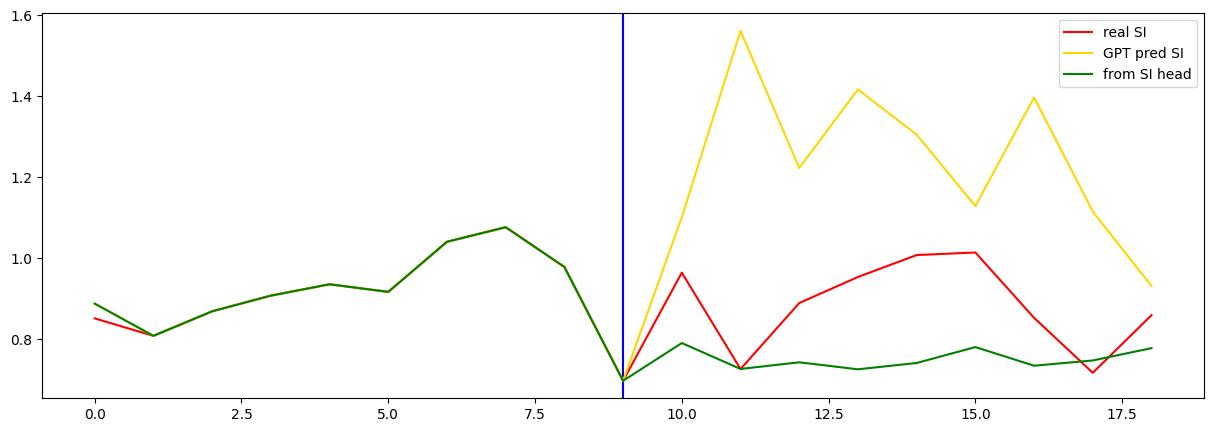

Testing R**2 - (all) - (no inputs):  0.9334394360751002
Testing R**2 - (f2) - SI full (no inputs):  -15.645361941207188
0 ...index R**2 (no inputs):  -18.58518649915214
1 ...index R**2 (no inputs):  -1.481319758558712
2 ...index R**2 (no inputs):  -15.645361941207188
3 ...index R**2 (no inputs):  -26.45047338987368
4 ...index R**2 (no inputs):  -41.901941654633625
5 ...index R**2 (no inputs):  -6.388734465470126
6 ...index R**2 (no inputs):  -1205.983689872283
7 ...index R**2 (no inputs):  -31262.5055678169
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -3.823490279950005
10 ...index R**2 (no inputs):  -1.0652514656768464
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -45.00020021232462
16 ...index R**2 (no inputs):  -2.8622369293052503
17 ...index R**2 (no inputs):  -799.5654050240662
18 ...index R**2 (no inputs):  -12.833567987728342
19 ...index

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 1.155899
Loss_SI: 1.1558988094329834 Loss_all: 1.193845510482788
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.294354
Loss_SI: 0.2943541407585144 Loss_all: 3.2871830463409424
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.088894
Loss_SI: 0.08889400213956833 Loss_all: 3.9731428623199463
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.108240
Loss_SI: 0.10824041068553925 Loss_all: 3.891117572784424
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.091092
Loss_SI: 0.09109170734882355 Loss_all: 3.5782153606414795
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.104787
Loss_SI: 0.10478703677654266 Loss_all: 3.8581578731536865
Prediction shape: torch.Size([32, 35])
===


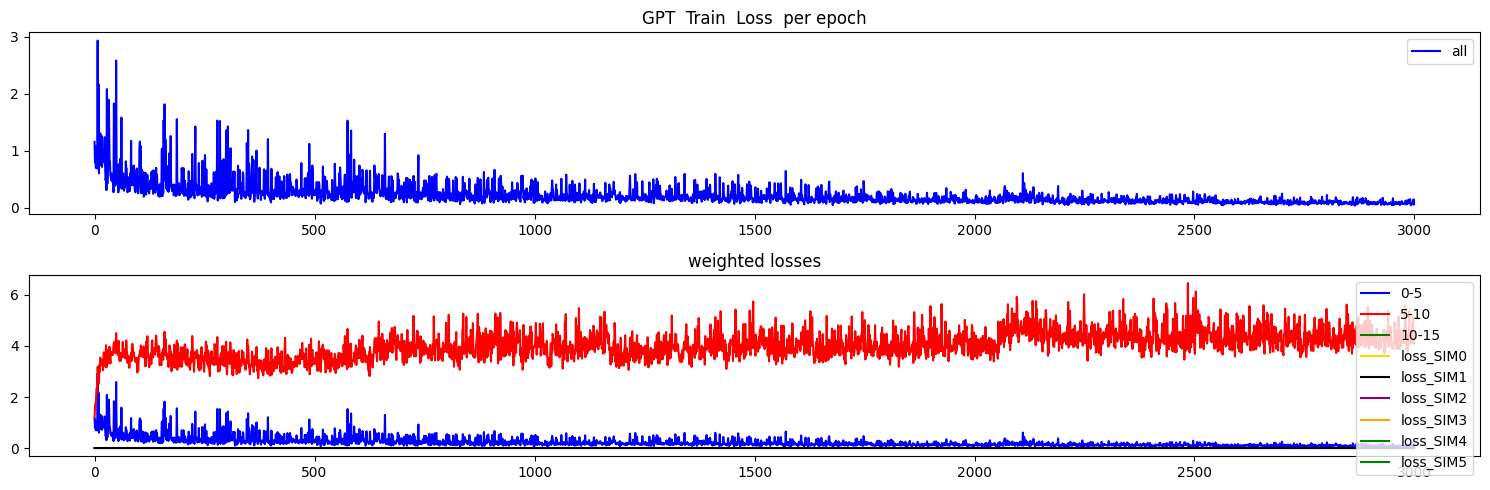

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


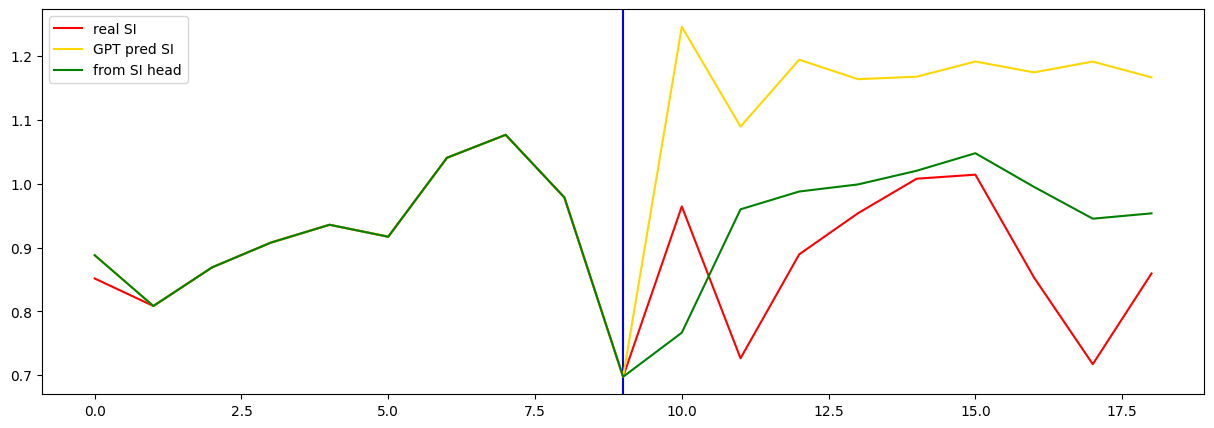

Testing R**2 - (all) - (no inputs):  0.4753991100350009
Testing R**2 - (f2) - SI full (no inputs):  -9.350229826669805
0 ...index R**2 (no inputs):  -2.8647305598907717
1 ...index R**2 (no inputs):  -60.411353798466294
2 ...index R**2 (no inputs):  -9.350229826669805
3 ...index R**2 (no inputs):  -20.923083864063656
4 ...index R**2 (no inputs):  -52091.43063599503
5 ...index R**2 (no inputs):  -58.149259204673676
6 ...index R**2 (no inputs):  -909.5682066579233
7 ...index R**2 (no inputs):  -250841.9547611963
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.0727815577473327
10 ...index R**2 (no inputs):  -0.518035098505971
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.799830715268435
16 ...index R**2 (no inputs):  -13.324698574665202
17 ...index R**2 (no inputs):  -25622.505363009022
18 ...index R**2 (no inputs):  -4.043342767010649
19 ...ind

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 0.353443
Loss_SI: 0.3534432649612427 Loss_all: 0.978754997253418
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.755364
Loss_SI: 0.7553644776344299 Loss_all: 4.737420558929443
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.196026
Loss_SI: 0.19602587819099426 Loss_all: 5.635956764221191
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.131356
Loss_SI: 0.1313563585281372 Loss_all: 6.180595397949219
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.112856
Loss_SI: 0.11285565793514252 Loss_all: 5.860957622528076
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.104001
Loss_SI: 0.10400116443634033 Loss_all: 6.881089687347412
Prediction shape: torch.Size([32, 35])
===


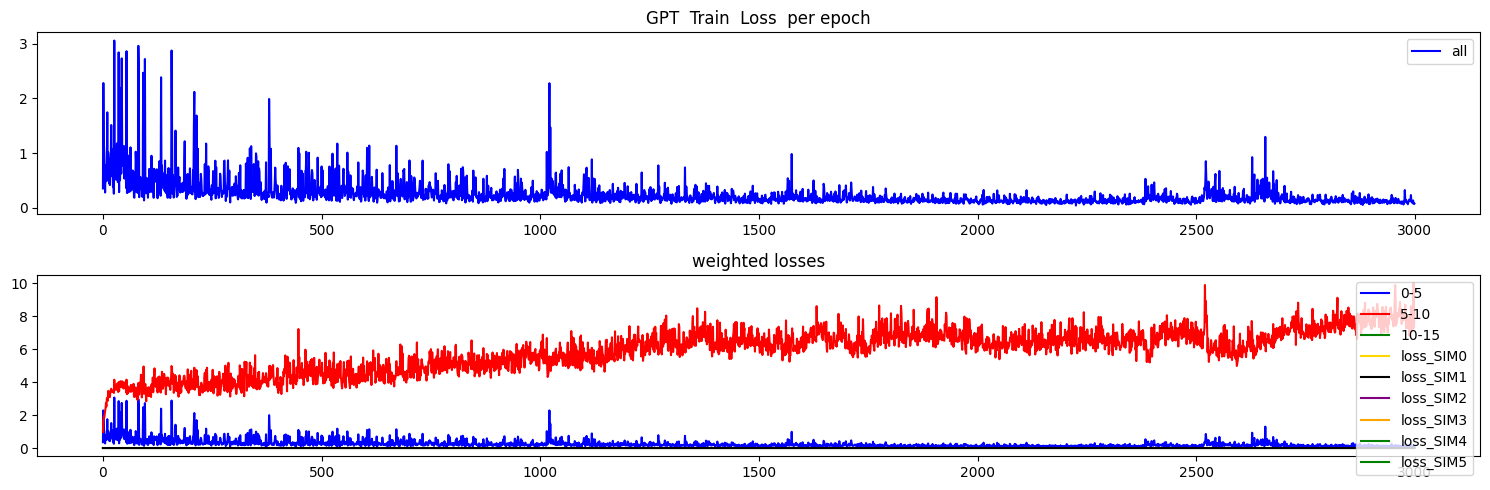

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


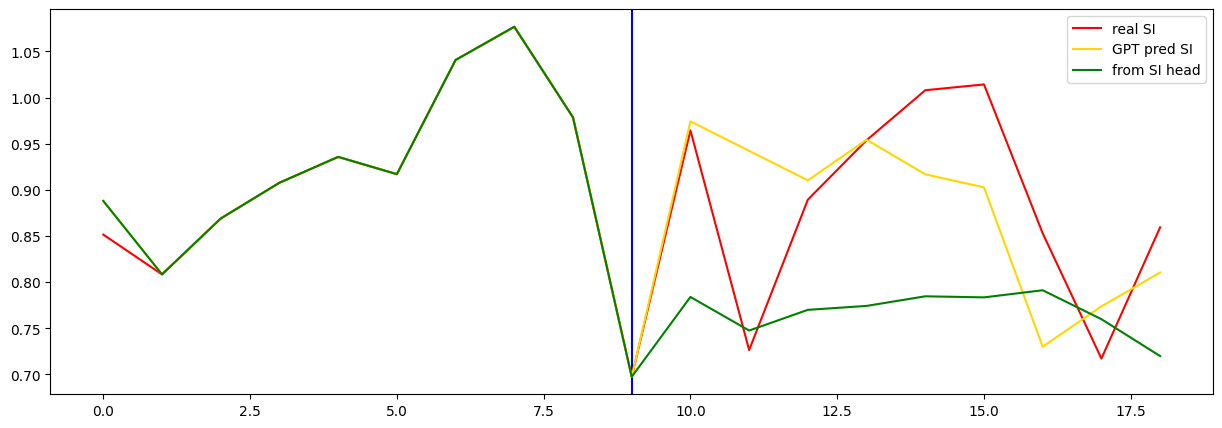

Testing R**2 - (all) - (no inputs):  0.6932870225686749
Testing R**2 - (f2) - SI full (no inputs):  0.017330062340903063
0 ...index R**2 (no inputs):  -2.6319548156687658
1 ...index R**2 (no inputs):  -0.17882110324809752
2 ...index R**2 (no inputs):  0.017330062340903063
3 ...index R**2 (no inputs):  -54.4611790385423
4 ...index R**2 (no inputs):  -31590.86525224691
5 ...index R**2 (no inputs):  -32.085256515816084
6 ...index R**2 (no inputs):  -1384.0323591730867
7 ...index R**2 (no inputs):  -309050.82440949115
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -35.12653050487545
10 ...index R**2 (no inputs):  -0.7730958213382229
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -27.53359281417393
16 ...index R**2 (no inputs):  -13.046655063230128
17 ...index R**2 (no inputs):  -120962.96328174543
18 ...index R**2 (no inputs):  -232.32381344947586
19 

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )



## Run 5


In [41]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 2.105450
Loss_SI: 2.105450391769409 Loss_all: 1.7232561111450195
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.118421
Loss_SI: 0.11842130124568939 Loss_all: 4.967650413513184
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.024659
Loss_SI: 0.024659067392349243 Loss_all: 5.140526294708252
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.048470
Loss_SI: 0.04846970736980438 Loss_all: 5.1723313331604
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.018497
Loss_SI: 0.018497180193662643 Loss_all: 5.424232006072998
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.019621
Loss_SI: 0.01962108537554741 Loss_all: 5.489948272705078
Prediction shape: torch.Size([32, 35])
===


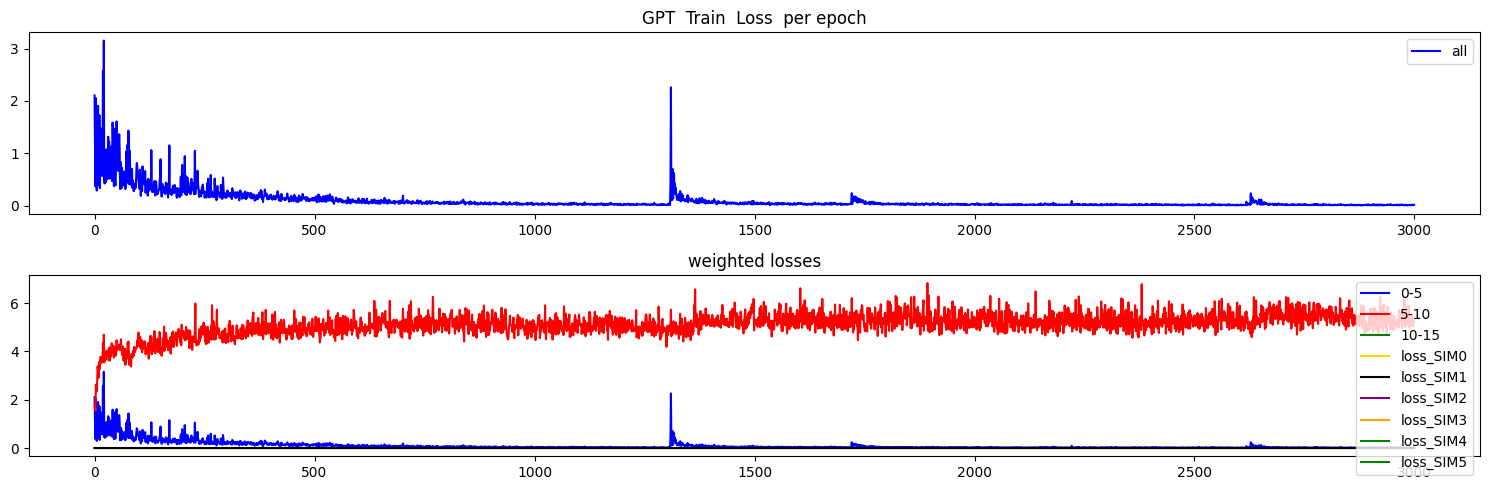

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


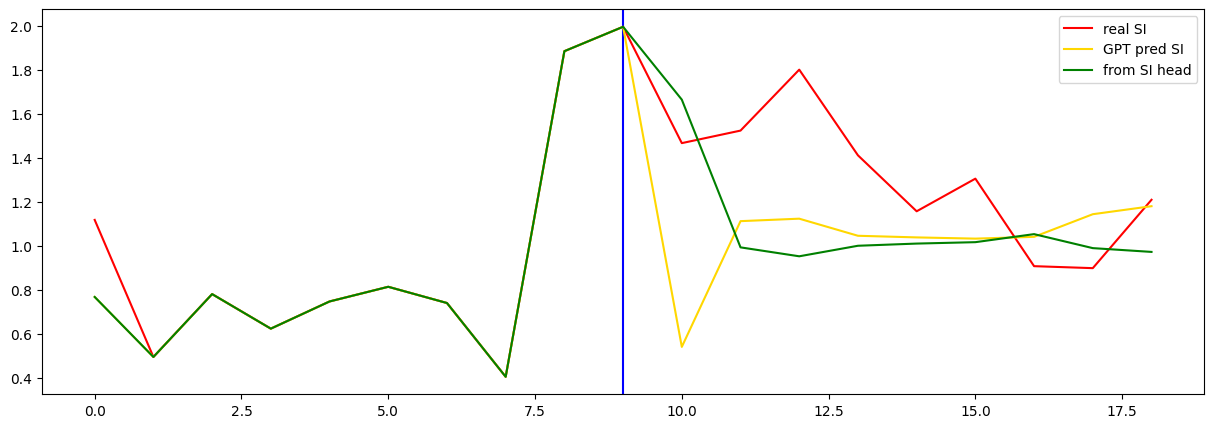

Testing R**2 - (all) - (no inputs):  -0.008491731143501324
Testing R**2 - (f2) - SI full (no inputs):  -1.4458245764461823
0 ...index R**2 (no inputs):  -4.887626386872746
1 ...index R**2 (no inputs):  -0.39582284422401326
2 ...index R**2 (no inputs):  -1.4458245764461823
3 ...index R**2 (no inputs):  -14.144888141784747
4 ...index R**2 (no inputs):  -1.2247980417855686
5 ...index R**2 (no inputs):  -5.406797758644847
6 ...index R**2 (no inputs):  -1.2219247419912
7 ...index R**2 (no inputs):  -15.740603079955772
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.4649113711706665
10 ...index R**2 (no inputs):  0.07801377707862278
11 ...index R**2 (no inputs):  -165.07930332800188
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.3467781187853527
16 ...index R**2 (no inputs):  -0.8107331979398191
17 ...index R**2 (no inputs):  -245.3215658001674
18 ...index R**2 (no inputs):  -0.7530

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 0.406802
Loss_SI: 0.4068019688129425 Loss_all: 0.9784882664680481
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.216444
Loss_SI: 0.2164439558982849 Loss_all: 4.083085060119629
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.143059
Loss_SI: 0.1430588662624359 Loss_all: 3.6505327224731445
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.042936
Loss_SI: 0.04293607175350189 Loss_all: 3.773171901702881
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.030459
Loss_SI: 0.03045913577079773 Loss_all: 4.564842700958252
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.024655
Loss_SI: 0.024654800072312355 Loss_all: 4.167048931121826
Prediction shape: torch.Size([32, 35])
===


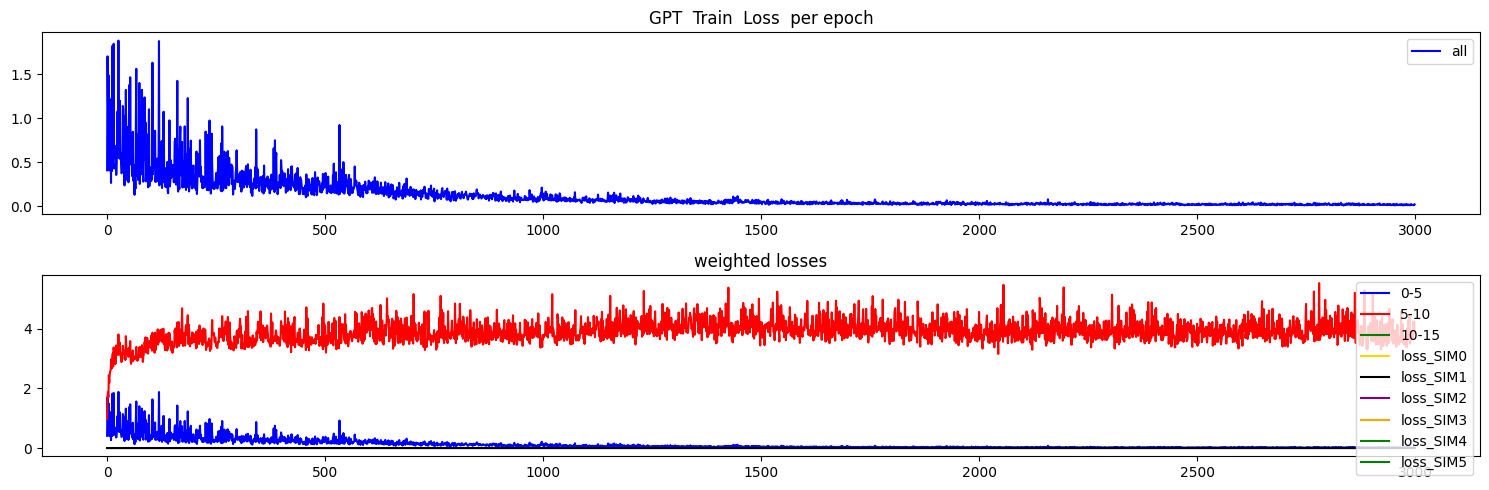

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


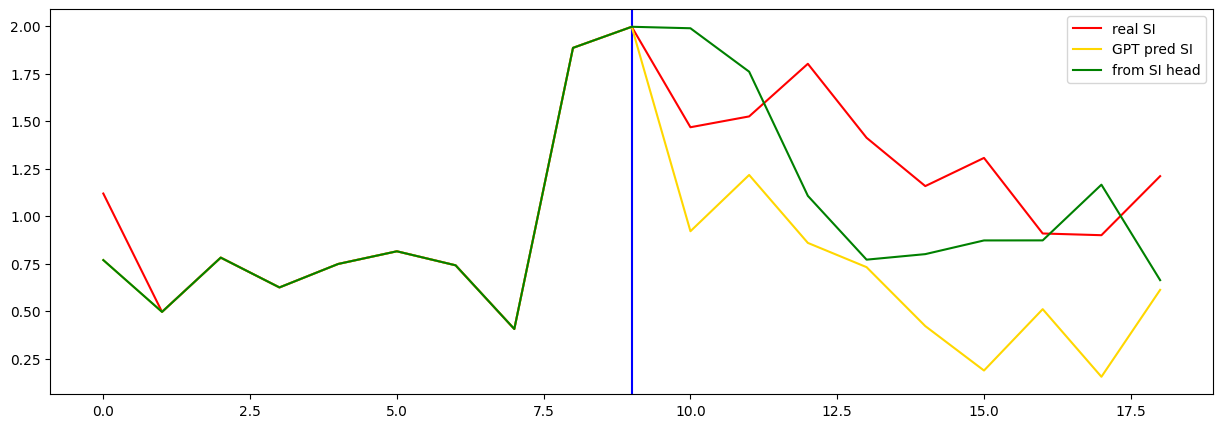

Testing R**2 - (all) - (no inputs):  0.0121962392336602
Testing R**2 - (f2) - SI full (no inputs):  -4.959448165470826
0 ...index R**2 (no inputs):  -0.717135881903707
1 ...index R**2 (no inputs):  -3.8164078613474395
2 ...index R**2 (no inputs):  -4.959448165470826
3 ...index R**2 (no inputs):  -5.943688005700005
4 ...index R**2 (no inputs):  -25.216283741009278
5 ...index R**2 (no inputs):  -5.26569467819641
6 ...index R**2 (no inputs):  -5.5873451537427945
7 ...index R**2 (no inputs):  -21.264901603968152
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -12.2038674239185
10 ...index R**2 (no inputs):  -3.9895984722832747
11 ...index R**2 (no inputs):  -2841.6418969641895
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -11.060109762973855
16 ...index R**2 (no inputs):  -0.535067238022181
17 ...index R**2 (no inputs):  -3191.885812331573
18 ...index R**2 (no inputs):  0.0181089367570

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )


[0] Train Loss: 0.948200
Loss_SI: 0.9481998085975647 Loss_all: 1.0242046117782593
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.196418
Loss_SI: 0.19641759991645813 Loss_all: 3.966747283935547
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.140974
Loss_SI: 0.14097417891025543 Loss_all: 5.038457870483398
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.205622
Loss_SI: 0.20562206208705902 Loss_all: 6.144280910491943
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.129553
Loss_SI: 0.12955252826213837 Loss_all: 6.254150390625
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.213555
Loss_SI: 0.21355508267879486 Loss_all: 4.9156060218811035
Prediction shape: torch.Size([32, 35])
===


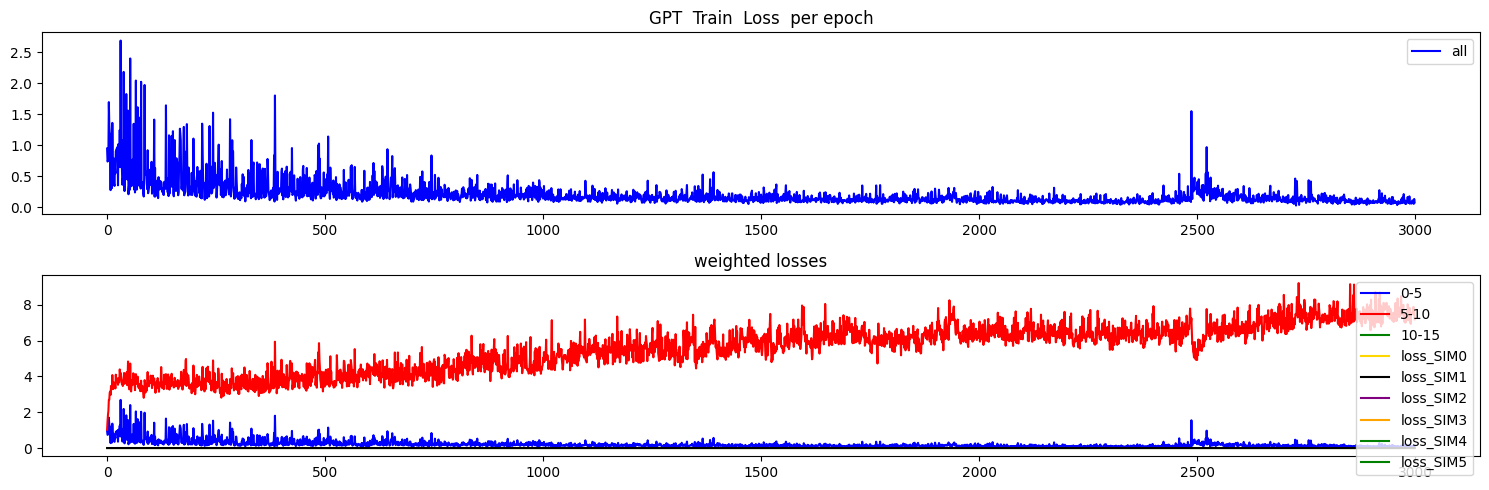

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


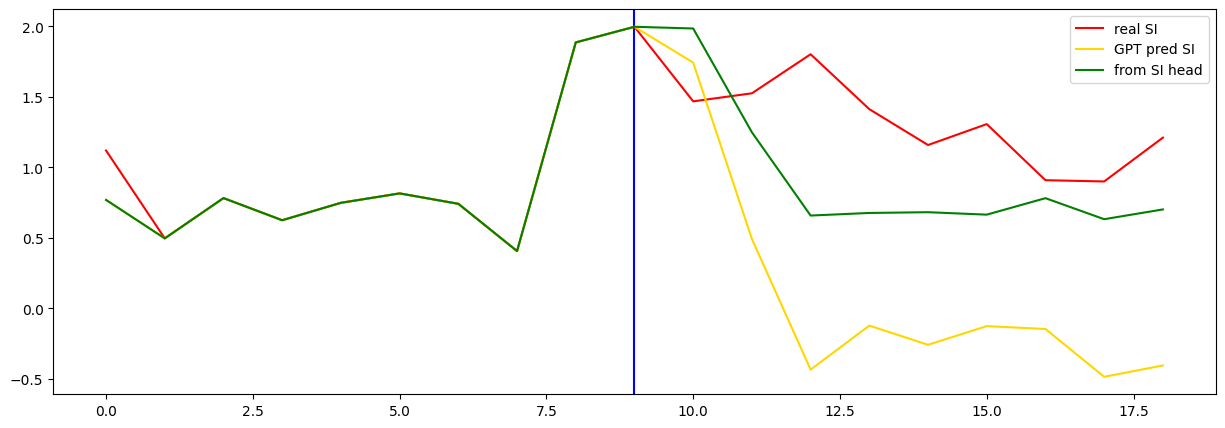

Testing R**2 - (all) - (no inputs):  -3.0106169204539244
Testing R**2 - (f2) - SI full (no inputs):  -23.6342766182014
0 ...index R**2 (no inputs):  -14.459792639765581
1 ...index R**2 (no inputs):  -1.3945837944005923
2 ...index R**2 (no inputs):  -23.6342766182014
3 ...index R**2 (no inputs):  0.10502943001923948
4 ...index R**2 (no inputs):  -45.09707538247619
5 ...index R**2 (no inputs):  -24.479598545838233
6 ...index R**2 (no inputs):  -4.555066142919505
7 ...index R**2 (no inputs):  -18.40461138128857
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -19.92549722172531
10 ...index R**2 (no inputs):  -9.874450326724386
11 ...index R**2 (no inputs):  -4312.630800251033
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.675529738388744
16 ...index R**2 (no inputs):  -1.6962863001637185
17 ...index R**2 (no inputs):  -9999.949003269701
18 ...index R**2 (no inputs):  -5.6553676928597

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
results_string = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )


[0] Train Loss: 0.603819
Loss_SI: 0.6038186550140381 Loss_all: 1.315980076789856
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.376859
Loss_SI: 0.3768593668937683 Loss_all: 4.488840103149414
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.289779
Loss_SI: 0.2897794246673584 Loss_all: 5.814228057861328
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.129821
Loss_SI: 0.1298213005065918 Loss_all: 6.101461410522461
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.120532
Loss_SI: 0.12053212523460388 Loss_all: 7.316979885101318
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.150036
Loss_SI: 0.15003594756126404 Loss_all: 8.582289695739746
Prediction shape: torch.Size([32, 35])
===


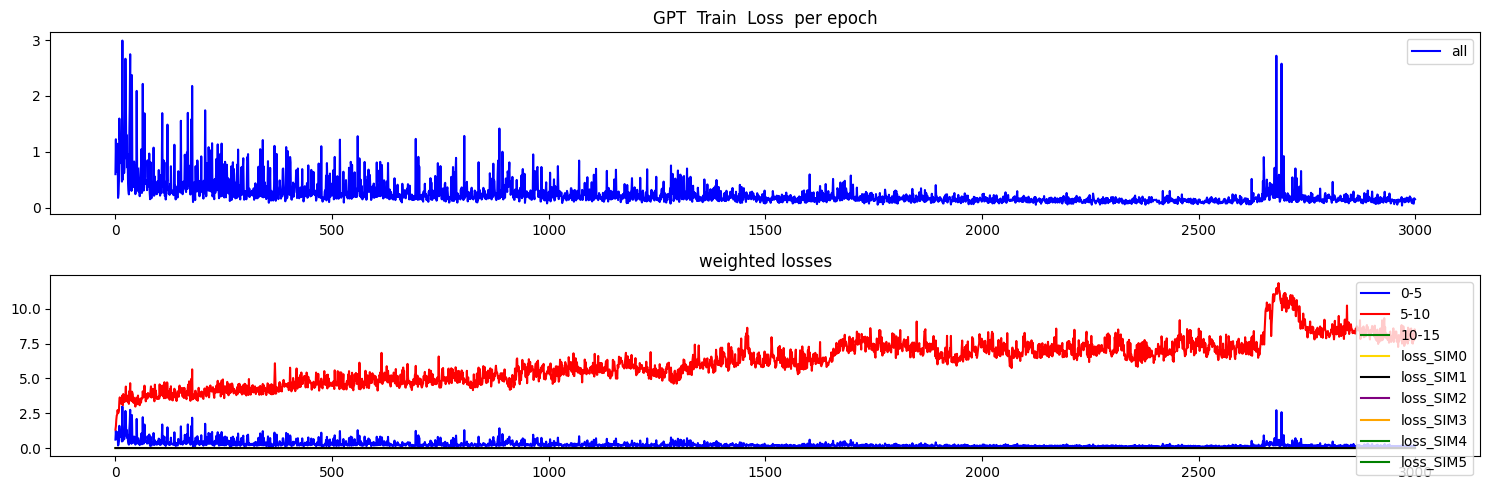

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


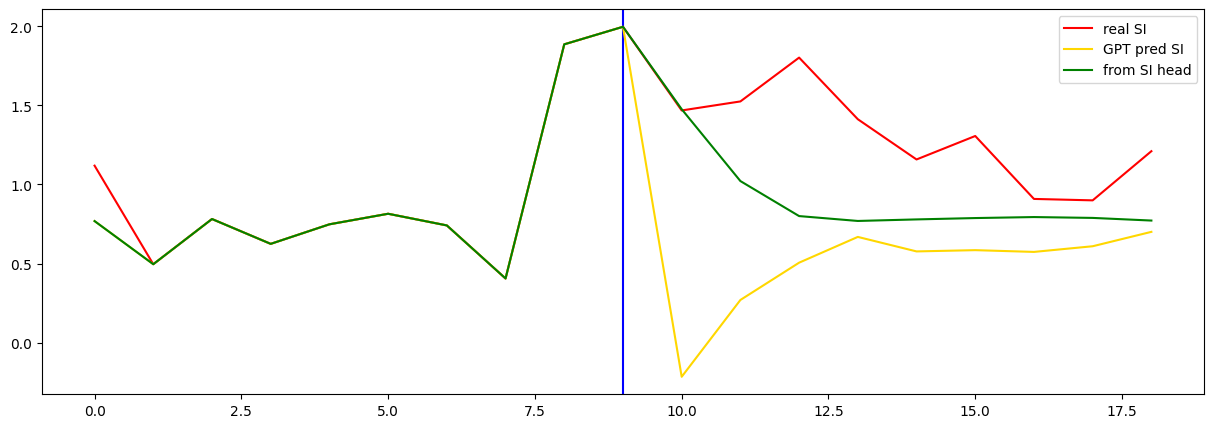

Testing R**2 - (all) - (no inputs):  -3.900410584945794
Testing R**2 - (f2) - SI full (no inputs):  -10.427512909484749
0 ...index R**2 (no inputs):  -11.74268967711312
1 ...index R**2 (no inputs):  -3.9175921891666867
2 ...index R**2 (no inputs):  -10.427512909484749
3 ...index R**2 (no inputs):  -0.6544829943090265
4 ...index R**2 (no inputs):  -205.04873056623165
5 ...index R**2 (no inputs):  -29.607184784460568
6 ...index R**2 (no inputs):  -2.6570696477377918
7 ...index R**2 (no inputs):  -47.10329763581745
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -15.454750470782564
10 ...index R**2 (no inputs):  -2.4763177591914274
11 ...index R**2 (no inputs):  -19075.755184819664
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7775266538032255
16 ...index R**2 (no inputs):  -6.42481105724753
17 ...index R**2 (no inputs):  -204306.62722866127
18 ...index R**2 (no inputs):  -11.77037

In [45]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

results_string = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )
